# ------------------Stock Price Prediction using Machine Learning---------------------

### 1. Introduction

#### This project focuses on predicting stoock price trend for a company . Unlike some other approaches which are concerned with fundamental analysis, the feature space is derived from the time series of the stock itself and is concerned with potential movement of past price. An algorithm is applied for feature selection and it suggests a subset of stock technical indiactors that are critical for predicting the stock trend. It explores different ways of validation and shows that overfitting tend to occur due to fundamentally nosiy nature of a single stock price. Experiment results suggest that we are able to achieve an accuracy of 55% in predicting the stock price movement with Random Forest Classifier and an accuracy of 69% in predicting a 3 day simple moving average price trend with Logistic Regression.

### 2. Feature Space

#### 2.1 Data Collection
The data is pulled from http://finance.yahoo.com . I picked 1 stock (AAPL) that has the time span available from 1988-01-01 to 2018-01-01 to get enough data and 2 market index's (NASDAQ and SP&500). The goal is to predict Apple stock’s trend using features derived from its time series plus those from NASDAQ and SP&500 for augmentation.

In [2]:
import warnings
warnings.filterwarnings("ignore")
from pandas_datareader import data as pdr
import fix_yahoo_finance as yahoo
yahoo.pdr_override()
start = "1988-01-01" 
end = "2018-01-01"
SP = pdr.get_data_yahoo("^GSPC",start,end)
NASDAQ = pdr.get_data_yahoo("^IXIC",start,end)
Apple = pdr.get_data_yahoo("AAPL",start,end)

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


In [3]:
SP.shape

(7561, 6)

In [4]:
NASDAQ.shape

(7561, 6)

In [5]:
Apple.shape

(7561, 6)

In [6]:
SP.rename(columns = {'Close':'SP_Close'},inplace=True)
SP.rename(columns = {'Open':'SP_Open'},inplace=True)
SP.rename(columns = {'High':'SP_High'},inplace=True)
SP.rename(columns = {'Low':'SP_Low'},inplace=True)
SP.rename(columns = {'Adj Close':'SP_Adj_Close'},inplace=True)
SP.rename(columns = {'Volume':'SP_Volume'},inplace=True)

NASDAQ.rename(columns = {'Close':'NASDAQ_Close'},inplace=True)
NASDAQ.rename(columns = {'Open':'NASDAQ_Open'},inplace=True)
NASDAQ.rename(columns = {'High':'NASDAQ_High'},inplace=True)
NASDAQ.rename(columns = {'Low':'NASDAQ_Low'},inplace=True)
NASDAQ.rename(columns = {'Adj Close':'NASDAQ_Adj_Close'},inplace=True)
NASDAQ.rename(columns = {'Volume':'NASDAQ_Volume'},inplace=True)

Apple.rename(columns = {'Close':'Apple_Close'},inplace=True)
Apple.rename(columns = {'Open':'Apple_Open'},inplace=True)
Apple.rename(columns = {'High':'Apple_High'},inplace=True)
Apple.rename(columns = {'Low':'Apple_Low'},inplace=True)
Apple.rename(columns = {'Adj Close':'Apple_Adj_Close'},inplace=True)
Apple.rename(columns = {'Volume':'Apple_Volume'},inplace=True)

In [7]:
SP.head()

,SP_Open,SP_High,SP_Low,SP_Close,SP_Adj_Close,SP_Volume
Date,,,,,,
1988-01-04,247.100006,256.440002,247.080002,255.940002,255.940002,181810000
1988-01-05,255.949997,261.779999,255.949997,258.630005,258.630005,209520000
1988-01-06,258.640015,259.790009,257.179993,258.890015,258.890015,169730000
1988-01-07,258.869995,261.320007,256.179993,261.070007,261.070007,175360000
1988-01-08,261.049988,261.070007,242.949997,243.399994,243.399994,197300000


In [8]:
NASDAQ.head()

,NASDAQ_Open,NASDAQ_High,NASDAQ_Low,NASDAQ_Close,NASDAQ_Adj_Close,NASDAQ_Volume
Date,,,,,,
1988-01-04,335.100006,338.600006,334.500000,338.500000,338.500000,110820000
1988-01-05,344.200012,345.799988,343.500000,344.100006,344.100006,149490000
1988-01-06,345.000000,346.799988,344.100006,346.700012,346.700012,135580000
1988-01-07,345.799988,349.700012,344.799988,349.700012,349.700012,137040000
1988-01-08,347.600006,348.299988,338.399994,338.500000,338.500000,144060000


In [9]:
Apple.head()

,Apple_Open,Apple_High,Apple_Low,Apple_Close,Apple_Adj_Close,Apple_Volume
Date,,,,,,
1988-01-04,1.526786,1.598214,1.508929,1.598214,0.087466,82600000
1988-01-05,1.642857,1.651786,1.580357,1.593750,0.087222,77280000
1988-01-06,1.607143,1.607143,1.562500,1.562500,0.085512,67200000
1988-01-07,1.553571,1.598214,1.517857,1.589286,0.086978,53200000
1988-01-08,1.589286,1.616071,1.410714,1.428571,0.078182,121520000


#### Merging all the data into one DataFrame named entireData

In [10]:
allData = [SP,NASDAQ["NASDAQ_Open"],NASDAQ["NASDAQ_Close"],NASDAQ["NASDAQ_High"],NASDAQ["NASDAQ_Low"],NASDAQ["NASDAQ_Adj_Close"],NASDAQ["NASDAQ_Volume"],Apple["Apple_Open"],Apple["Apple_Close"],Apple["Apple_High"],Apple["Apple_Low"],Apple["Apple_Adj_Close"],Apple["Apple_Volume"]]
dataList = [allData[i].to_frame()for i in range(1,len(allData))]
dataList.insert(0,SP)

In [11]:
import pandas as pd
import functools as ft
entireData = ft.reduce(lambda left,right: pd.merge(left,right,left_index=True,right_index=True),dataList)

In [12]:
entireData.head()

,SP_Open,SP_High,SP_Low,SP_Close,SP_Adj_Close,SP_Volume,NASDAQ_Open,NASDAQ_Close,NASDAQ_High,NASDAQ_Low,NASDAQ_Adj_Close,NASDAQ_Volume,Apple_Open,Apple_Close,Apple_High,Apple_Low,Apple_Adj_Close,Apple_Volume
Date,,,,,,,,,,,,,,,,,,
1988-01-04,247.100006,256.440002,247.080002,255.940002,255.940002,181810000,335.100006,338.500000,338.600006,334.500000,338.500000,110820000,1.526786,1.598214,1.598214,1.508929,0.087466,82600000
1988-01-05,255.949997,261.779999,255.949997,258.630005,258.630005,209520000,344.200012,344.100006,345.799988,343.500000,344.100006,149490000,1.642857,1.593750,1.651786,1.580357,0.087222,77280000
1988-01-06,258.640015,259.790009,257.179993,258.890015,258.890015,169730000,345.000000,346.700012,346.799988,344.100006,346.700012,135580000,1.607143,1.562500,1.607143,1.562500,0.085512,67200000
1988-01-07,258.869995,261.320007,256.179993,261.070007,261.070007,175360000,345.799988,349.700012,349.700012,344.799988,349.700012,137040000,1.553571,1.589286,1.598214,1.517857,0.086978,53200000
1988-01-08,261.049988,261.070007,242.949997,243.399994,243.399994,197300000,347.600006,338.500000,348.299988,338.399994,338.500000,144060000,1.589286,1.428571,1.616071,1.410714,0.078182,121520000


In [13]:
saveIndex = entireData.index.values
entireData = entireData.reset_index()
entireData

,Date,SP_Open,SP_High,SP_Low,SP_Close,SP_Adj_Close,SP_Volume,NASDAQ_Open,NASDAQ_Close,NASDAQ_High,NASDAQ_Low,NASDAQ_Adj_Close,NASDAQ_Volume,Apple_Open,Apple_Close,Apple_High,Apple_Low,Apple_Adj_Close,Apple_Volume
0,1988-01-04,247.100006,256.440002,247.080002,255.940002,255.940002,181810000,335.100006,338.500000,338.600006,334.500000,338.500000,110820000,1.526786,1.598214,1.598214,1.508929,0.087466,82600000
1,1988-01-05,255.949997,261.779999,255.949997,258.630005,258.630005,209520000,344.200012,344.100006,345.799988,343.500000,344.100006,149490000,1.642857,1.593750,1.651786,1.580357,0.087222,77280000
2,1988-01-06,258.640015,259.790009,257.179993,258.890015,258.890015,169730000,345.000000,346.700012,346.799988,344.100006,346.700012,135580000,1.607143,1.562500,1.607143,1.562500,0.085512,67200000
3,1988-01-07,258.869995,261.320007,256.179993,261.070007,261.070007,175360000,345.799988,349.700012,349.700012,344.799988,349.700012,137040000,1.553571,1.589286,1.598214,1.517857,0.086978,53200000
4,1988-01-08,261.049988,261.070007,242.949997,243.399994,243.399994,197300000,347.600006,338.500000,348.299988,338.399994,338.500000,144060000,1.589286,1.428571,1.616071,1.410714,0.078182,121520000
5,1988-01-11,243.380005,247.509995,241.070007,247.490005,247.490005,158980000,333.200012,336.200012,336.299988,332.500000,336.200012,128750000,1.428571,1.517857,1.526786,1.419643,0.083069,101080000
6,1988-01-12,247.440002,247.490005,240.460007,245.419998,245.419998,165730000,332.700012,332.000000,333.000000,329.000000,332.000000,120350000,1.535714,1.500000,1.553571,1.419643,0.082091,100240000
7,1988-01-13,245.410004,249.250000,241.410004,245.809998,245.809998,154020000,330.299988,332.700012,333.399994,329.799988,332.700012,115670000,1.500000,1.508929,1.544643,1.468750,0.082580,52920000
8,1988-01-14,245.830002,247.000000,243.970001,245.880005,245.880005,140570000,334.500000,334.200012,334.899994,333.700012,334.200012,101510000,1.526786,1.508929,1.531250,1.500000,0.082580,33040000
9,1988-01-15,246.020004,253.649994,245.880005,252.050003,252.050003,197940000,340.600006,340.100006,341.500000,340.000000,340.100006,134160000,1.553571,1.531250,1.607143,1.517857,0.083801,85960000


#### 2.2 Features of Stock Indicators
A stock technical indicator is a series of data points that are derived by applying a function to the
price data at time t and study period n.<br>
Technical indicators cover different type of features:<br>
1) Price change – ROCR, MOM <br>
2) Stock trend discovery – MFI <br>
3) Buy&Sell signals – RSI, CCI, MACD <br>
4) Volume weights – OBV 

In [14]:
def dailyReturns(close,numberofDays):
    daily_returns = (close / close.shift(numberofDays)) - 1
    return daily_returns

In [15]:
entireData["DailyReturns_SP"] = dailyReturns(entireData["SP_Close"],1)
entireData["DailyReturns_NASDAQ"] = dailyReturns(entireData["NASDAQ_Close"],1)
entireData["DailyReturns_Apple"] = dailyReturns(entireData["Apple_Close"],1)

entireData["twoDaysReturns_SP"] = dailyReturns(entireData["SP_Close"],2)
entireData["twoDaysReturns_NASDAQ"] = dailyReturns(entireData["NASDAQ_Close"],2)
entireData["twoDaysReturns_Apple"] = dailyReturns(entireData["Apple_Close"],2)

entireData["threeDaysReturns_SP"] = dailyReturns(entireData["SP_Close"],3)
entireData["threeDaysReturns_NASDAQ"] = dailyReturns(entireData["NASDAQ_Close"],3)
entireData["threeDaysReturns_Apple"] = dailyReturns(entireData["Apple_Close"],3)

entireData["fourDaysReturns_SP"] = dailyReturns(entireData["SP_Close"],4)
entireData["fourDaysReturns_NASDAQ"] = dailyReturns(entireData["NASDAQ_Close"],4)
entireData["fourDaysReturns_Apple"] = dailyReturns(entireData["Apple_Close"],4)

entireData["fiveDaysReturns_SP"] = dailyReturns(entireData["SP_Close"],5)
entireData["fiveDaysReturns_NASDAQ"] = dailyReturns(entireData["NASDAQ_Close"],5)
entireData["fiveDaysReturns_Apple"] = dailyReturns(entireData["Apple_Close"],5)

In [16]:
import numpy as np
def volatility2(high,low):
    volatility2=np.log(high/low)**2
    return volatility2

In [17]:
entireData["Volatilty_SP"] = volatility2(entireData["SP_High"],entireData["SP_Low"])
entireData["Volatility_NASDAQ"] = volatility2(entireData["NASDAQ_High"],entireData["NASDAQ_Low"])
entireData["Volatility_Apple"] = volatility2(entireData["Apple_High"],entireData["Apple_Low"])

In [18]:
def volume(volume):
    result=volume/volume.rolling(5).mean()
    return result

In [19]:
entireData["VolumeFea_SP"] = volume(entireData["SP_Volume"])
entireData["VolumeFea_NASDAQ"] = volume(entireData["NASDAQ_Volume"])
entireData["VolumeFea_Apple"] = volume(entireData["Apple_Volume"])

In [20]:
def movingDeviation(close,numberofDays):
    movingDeviation=(close-close.rolling(numberofDays).mean())/close.rolling(numberofDays).mean()
    return movingDeviation

In [21]:
entireData["MD10_SP"] = movingDeviation(entireData["SP_Close"],10)
entireData["MD10_NASDAQ"] = movingDeviation(entireData["NASDAQ_Close"],10)
entireData["MD10_Apple"] = movingDeviation(entireData["Apple_Close"],10)

entireData["MD21_SP"] = movingDeviation(entireData["SP_Close"],21)
entireData["MD21_NASDAQ"] = movingDeviation(entireData["NASDAQ_Close"],21)
entireData["MD21_Apple"] = movingDeviation(entireData["Apple_Close"],21)

In [22]:
def ROCR(close, numberofDays):  
    X = close.diff(numberofDays - 1)  
    Y = close.shift(numberofDays - 1)  
    ROCR = pd.Series(((X / Y) * 100))   
    return ROCR

In [23]:
entireData["ROCR3_SP"] = ROCR(entireData["SP_Close"],3)
entireData["ROCR3_NASDAQ"] = ROCR(entireData["NASDAQ_Close"],3)
entireData["ROCR3_Apple"] = ROCR(entireData["Apple_Close"],3)

entireData["ROCR12_SP"] = ROCR(entireData["SP_Close"],12)
entireData["ROCR12_NASDAQ"] = ROCR(entireData["NASDAQ_Close"],12)
entireData["ROCR12_Apple"] = ROCR(entireData["Apple_Close"],12)

In [24]:
def MOM(close, numberofDays):  
    X = pd.Series(close.diff(numberofDays))    
    return X

In [25]:
entireData["MOM1_SP"] = MOM(entireData["SP_Close"],1)
entireData["MOM1_NASDAQ"] = MOM(entireData["NASDAQ_Close"],1)
entireData["MOM1_Apple"] = MOM(entireData["Apple_Close"],1)

entireData["MOM3_SP"] = MOM(entireData["SP_Close"],3)
entireData["MOM3_NASDAQ"] = MOM(entireData["NASDAQ_Close"],3)
entireData["MOM3_Apple"] = MOM(entireData["Apple_Close"],3)

In [26]:
def MFI(dataFrame,high,low,close,volume,numberofDays):  
    PP = (high + low + close) / 3  
    i = 0  
    PosMF = [0]  
    while i < dataFrame.index[-1]:  
        if PP[i + 1] > PP[i]:  
            PosMF.append(PP[i + 1] * volume[i+1])  
        else:  
            PosMF.append(0)  
        i = i + 1  
    PosMF = pd.Series(PosMF)  
    TotMF = PP * volume  
    MFR = pd.Series(PosMF / TotMF)  
    MFI = pd.Series(pd.rolling_mean(MFR, numberofDays))   
    return MFI

In [27]:
entireData["MFI14_SP"] = MFI(entireData,entireData["SP_High"],entireData["SP_Low"],entireData["SP_Close"],entireData["SP_Volume"],14)
entireData["MFI14_NASDAQ"] = MFI(entireData,entireData["NASDAQ_High"],entireData["NASDAQ_Low"],entireData["NASDAQ_Close"],entireData["NASDAQ_Volume"],14)
entireData["MFI14_Apple"] = MFI(entireData,entireData["Apple_High"],entireData["Apple_Low"],entireData["Apple_Close"],entireData["Apple_Volume"],14)

In [28]:
import numpy as np
def RSI(close, numberofDays):
    deltas = np.diff(close)
    seed = deltas[:numberofDays+1]
    up = seed[seed>=0].sum()/numberofDays
    down = -seed[seed<0].sum()/numberofDays
    rs = up/down
    RSI = np.zeros_like(close)
    RSI[:numberofDays] = 100. - 100./(1.+rs)
    for i in range(numberofDays, len(close)):
        delta = deltas[i-1] 
        if delta>0:
            upval = delta
            downval = 0.
        else:
            upval = 0.
            downval = -delta
        up = (up*(numberofDays-1) + upval)/numberofDays
        down = (down*(numberofDays-1) + downval)/numberofDays
        rs = up/down
        RSI[i] = 100. - 100./(1.+rs)
    return RSI

In [29]:
entireData["RSI6_SP"] = RSI(entireData["SP_Close"],6)
entireData["RSI6_NASDAQ"] = RSI(entireData["NASDAQ_Close"],6)
entireData["RSI6_Apple"] = RSI(entireData["Apple_Close"],6)

entireData["RSI12_SP"] = RSI(entireData["SP_Close"],12)
entireData["RSI12_NASDAQ"] = RSI(entireData["NASDAQ_Close"],12)
entireData["RSI12_Apple"] = RSI(entireData["Apple_Close"],12)

In [30]:
def EMA(close, numberofDays):  
    EMA = pd.Series(pd.ewma(close, span = numberofDays, min_periods = numberofDays - 1))   
    return EMA

In [31]:
entireData["EMA6_SP"] = EMA(entireData["SP_Close"],6)
entireData["EMA6_NASDAQ"] = EMA(entireData["NASDAQ_Close"],6)
entireData["EMA6_Apple"] = EMA(entireData["Apple_Close"],6)

entireData["EMA12_SP"] = EMA(entireData["SP_Close"],12)
entireData["EMA12_NASDAQ"] = EMA(entireData["NASDAQ_Close"],12)
entireData["EMA12_Apple"] = EMA(entireData["Apple_Close"],12)

entireData["EMA20_SP"] = EMA(entireData["SP_Close"],20)
entireData["EMA20_NASDAQ"] = EMA(entireData["NASDAQ_Close"],20)
entireData["EMA20_Apple"] = EMA(entireData["Apple_Close"],20)

In [32]:
def MACD(close, slow=26, fast=12):
    emaSlow = EMA(close, slow)
    emaFast = EMA(close, fast)
    return emaFast - emaSlow

In [33]:
entireData["MACD_SP"] = MACD(entireData["SP_Close"])
entireData["MACD_NASDAQ"] = MACD(entireData["NASDAQ_Close"])
entireData["MACD_Apple"] = MACD(entireData["Apple_Close"])

In [34]:
def CCI(high,low,close,numberofDays): 
    TP = (high + low + close) / 3 
    CCI = pd.Series((TP - pd.rolling_mean(TP, numberofDays)) / (0.015 * pd.rolling_std(TP, numberofDays)))  
    return CCI

In [35]:
entireData["CCI_SP"] = CCI(entireData["SP_High"],entireData["SP_Low"],entireData["SP_Close"],12)
entireData["CCI_NASDAQ"] = CCI(entireData["NASDAQ_High"],entireData["NASDAQ_Low"],entireData["NASDAQ_Close"],12)
entireData["CCI_Apple"] = CCI(entireData["Apple_High"],entireData["Apple_Low"],entireData["Apple_Close"],12)

entireData["CCI_SP"] = CCI(entireData["SP_High"],entireData["SP_Low"],entireData["SP_Close"],20)
entireData["CCI_NASDAQ"] = CCI(entireData["NASDAQ_High"],entireData["NASDAQ_Low"],entireData["NASDAQ_Close"],20)
entireData["CCI_Apple"] = CCI(entireData["Apple_High"],entireData["Apple_Low"],entireData["Apple_Close"],20)

In [36]:
def OBV(dataFrame,close,volume, numberofDays):  
    ind = range(0,len(dataFrame))
    indexlist = list(ind)
    dataFrame.index = indexlist
    i = 0  
    OBV = [0]  
    while i < dataFrame.index[-1]:  
        if close[i+1] - close[i] > 0:  
            OBV.append(volume[i+1]) 
        if close[i+1] - close[i] == 0:  
            OBV.append(0)  
        if close[i+1] - close[i] < 0:  
            OBV.append(-volume[i+1])  
        i = i + 1  
    OBV = pd.Series(OBV)  
    OBV_ma = pd.Series(pd.rolling_mean(OBV, numberofDays))    
    return OBV_ma

In [37]:
entireData["OBV_SP"] = OBV(entireData,entireData["SP_Close"],entireData["SP_Volume"],21)
entireData["OBV_NASDAQ"] = OBV(entireData,entireData["NASDAQ_Close"],entireData["NASDAQ_Volume"],21)
entireData["OBV_Apple"] = OBV(entireData,entireData["Apple_Close"],entireData["Apple_Volume"],21)

In [38]:
def upperBB(close, numberofDays):
    MA = close.rolling(numberofDays).mean()
    SD = close.rolling(numberofDays).std()
    upperBB = MA + (2 * SD)
    return upperBB
def lowerBB(close, numberofDays):
    MA = close.rolling(numberofDays).mean()
    SD = close.rolling(numberofDays).std()
    lowerBB = MA + (2 * SD)
    return lowerBB

In [39]:
entireData["upperBB_SP"] = upperBB(entireData["SP_Close"],14)
entireData["upperBB_NASDAQ"] = upperBB(entireData["NASDAQ_Close"],14)
entireData["upperBB_Apple"] = upperBB(entireData["Apple_Close"],14)

entireData["lowerBB_SP"] = lowerBB(entireData["SP_Close"],14)
entireData["lowerBB_NASDAQ"] = lowerBB(entireData["NASDAQ_Close"],14)
entireData["lowerBB_Apple"] = lowerBB(entireData["Apple_Close"],14)

In [40]:
def EVM(high,low,volume,numberofDays):
    dm = ((high + low) - ((high.shift(1) + low.shift(1))/2))
    br = (volume / 100000000) / ((high - low))
    EVM = dm / br
    EVM_MA = pd.Series(pd.rolling_mean(EVM, numberofDays))
    return EVM_MA

In [41]:
entireData["EVM_SP"] = EVM(entireData["SP_High"],entireData["SP_Low"],entireData["SP_Volume"],14)
entireData["EVM_NASDAQ"] = EVM(entireData["NASDAQ_High"],entireData["NASDAQ_Low"],entireData["NASDAQ_Volume"],14)
entireData["EVM_Apple"] = EVM(entireData["Apple_High"],entireData["Apple_Low"],entireData["Apple_Volume"],14)

In [42]:
def SMA(close, numberofDays):
    SMA = pd.Series(pd.rolling_mean(close, numberofDays))
    return SMA

In [43]:
entireData["SMA3_SP"] = SMA(entireData["SP_Close"],3)
entireData["SMA3_NASDAQ"] = SMA(entireData["NASDAQ_Close"],3)
entireData["SMA3_Apple"] = SMA(entireData["Apple_Close"],3)

In [44]:
def FI(close,volume,numberofDays):
    FI = pd.Series(close.diff(numberofDays) * volume)
    return FI

In [45]:
entireData["FI_SP"] = FI(entireData["SP_Close"],entireData["SP_Volume"],10)
entireData["FI_NASDAQ"] = FI(entireData["NASDAQ_Close"],entireData["NASDAQ_Volume"],10)
entireData["FI_Apple"] = FI(entireData["Apple_Close"],entireData["Apple_Volume"],10)

In [46]:
def Chaikin(close,high,low,volume):  
    ad = (2 * close - high - low) / (high - low) * volume 
    Chaikin = pd.Series(pd.ewma(ad, span = 3, min_periods = 2) - pd.ewma(ad, span = 10, min_periods = 9))   
    return Chaikin

In [47]:
entireData["Chaikin_SP"] = Chaikin(entireData["SP_Close"],entireData["SP_High"],entireData["SP_Low"],entireData["SP_Volume"])
entireData["Chaikin_NASDAQ"] = Chaikin(entireData["NASDAQ_Close"],entireData["NASDAQ_High"],entireData["NASDAQ_Low"],entireData["NASDAQ_Volume"])
entireData["Chaikin_Apple"] = Chaikin(entireData["Apple_Close"],entireData["Apple_High"],entireData["Apple_Low"],entireData["Apple_Volume"])

In [48]:
def stdDev(close, numberofDays):  
    stddev = pd.Series(pd.rolling_std(close, numberofDays)) 
    return stddev

In [49]:
entireData["StdDev_SP"] = stdDev(entireData["SP_Close"],21)
entireData["StdDev_NASDAQ"] = stdDev(entireData["NASDAQ_Close"],21)
entireData["StdDev_Apple"] = stdDev(entireData["Apple_Close"],21)

#### 2.2 Feature Construction and Data Labeling
Those indicators are computed against different periods from 3-day to 20-day and each of them is treated as individual feature in feature space. E.g. ROCR3, ROCR6 means relative price to 3 days ago and to 6 days ago relatively. <br>
Depends on what we want to predict, the data is labeled with “Up or Down”. Y(t) is the label for data at time t, Y(t) = f(Price(t+n),Price(t+n-1),…Price(t)) where function f has the value in {-1,1}. In this setting, it is guaranteed that future price trend is unseen to any features. <br>
For predicting the next day trend,<br>
Y(t) = 1 if Price(t+1) > Price(t); Y(t) = -1 if Price(t+1) < Price(t).<br> 
For predicting the next 3-day average price trend,<br>
Y(t) = 1 if SMA(t+3) > SMA(t); Y(t) = -1 if SMA(t+3) < Price(t).<br>

In [50]:
def target1(dataFrame):
    targetList =[]
    data = dataFrame["Apple_Close"]
    for i in range(len(data)-1):
        if data[i+1] > data[i]:
            target = 1
        else:
            target = -1
            
        targetList.append(target)
    targets = pd.DataFrame(targetList)
    return targets

#### Merging the label with the entire data

In [51]:
label1 = target1(entireData)
addData = [entireData, label1[0]]
dataList = [addData[i].to_frame() for i in range(1,len(addData))]
dataList.insert(0,entireData)

In [52]:
Data = ft.reduce(lambda left,right: pd.merge(left,right,left_index=True,right_index=True),dataList)

In [53]:
def target2(dataFrame):
    targetList =[]
    data = dataFrame["SMA3_Apple"]
    for i in range(len(data)-3):
        if data[i+3] > data[i]:
            target = 1
        else:
            target = -1
            
        targetList.append(target)
    targets = pd.DataFrame(targetList)
    return targets

In [54]:
label2 = target2(Data)
addData = [Data, label2[0]]
dataList = [addData[i].to_frame() for i in range(1,len(addData))]
dataList.insert(0,Data)

In [55]:
Data = ft.reduce(lambda left,right: pd.merge(left,right,left_index=True,right_index=True),dataList)

#### The below label(difference) will be used in the later stage of the project to build a trading algorithm

In [56]:
def difference(dataFrame):
    targetList =[]
    data = dataFrame["Apple_Close"]
    dataEMA = dataFrame["EMA20_Apple"]
    for i in range(len(data)-1):
        if data[i+1] - dataEMA[i+1] > 0:
            target = 1
        else:
            target = -1
            
        targetList.append(target)
    targets = pd.DataFrame(targetList)
    return targets

In [57]:
Data["Difference"]=difference(Data)

In [58]:
Data

,Date,SP_Open,SP_High,SP_Low,SP_Close,SP_Adj_Close,SP_Volume,NASDAQ_Open,NASDAQ_Close,NASDAQ_High,...,FI_Apple,Chaikin_SP,Chaikin_NASDAQ,Chaikin_Apple,StdDev_SP,StdDev_NASDAQ,StdDev_Apple,0_x,0_y,Difference
0,1988-01-04,247.100006,256.440002,247.080002,255.940002,255.940002,181810000,335.100006,338.500000,338.600006,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,-1.0
1,1988-01-05,255.949997,261.779999,255.949997,258.630005,258.630005,209520000,344.200012,344.100006,345.799988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,-1.0
2,1988-01-06,258.640015,259.790009,257.179993,258.890015,258.890015,169730000,345.000000,346.700012,346.799988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,-1,-1.0
3,1988-01-07,258.869995,261.320007,256.179993,261.070007,261.070007,175360000,345.799988,349.700012,349.700012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,-1.0
4,1988-01-08,261.049988,261.070007,242.949997,243.399994,243.399994,197300000,347.600006,338.500000,348.299988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,-1,-1.0
5,1988-01-11,243.380005,247.509995,241.070007,247.490005,247.490005,158980000,333.200012,336.200012,336.299988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,-1.0
6,1988-01-12,247.440002,247.490005,240.460007,245.419998,245.419998,165730000,332.700012,332.000000,333.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,-1.0
7,1988-01-13,245.410004,249.250000,241.410004,245.809998,245.809998,154020000,330.299988,332.700012,333.399994,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,1,-1.0
8,1988-01-14,245.830002,247.000000,243.970001,245.880005,245.880005,140570000,334.500000,334.200012,334.899994,...,NaN,-5.274762e+06,-1.531118e+07,-2.164710e+06,NaN,NaN,NaN,1,1,-1.0
9,1988-01-15,246.020004,253.649994,245.880005,252.050003,252.050003,197940000,340.600006,340.100006,341.500000,...,NaN,1.838156e+07,-5.255588e+07,-1.872797e+07,NaN,NaN,NaN,-1,-1,-1.0


#### Changing the index from dates to numbers and renaming the label column names

In [59]:
Data.rename(columns = {'index':'Date'},inplace=True)
Data.rename(columns = {'0_x':'Target1'},inplace=True)
Data.rename(columns = {'0_y':'Target2'},inplace=True)

In [60]:
Data.dropna(inplace=True)

In [61]:
Data

,Date,SP_Open,SP_High,SP_Low,SP_Close,SP_Adj_Close,SP_Volume,NASDAQ_Open,NASDAQ_Close,NASDAQ_High,...,FI_Apple,Chaikin_SP,Chaikin_NASDAQ,Chaikin_Apple,StdDev_SP,StdDev_NASDAQ,StdDev_Apple,Target1,Target2,Difference
24,1988-02-05,252.220001,253.850006,250.899994,250.960007,250.960007,161310000,346.600006,345.799988,346.700012,...,-7.375189e+05,-5.677901e+07,-8.109757e+06,-1.020500e+07,4.222148,4.652777,0.047866,1,1,-1.0
25,1988-02-08,250.949997,250.960007,247.820007,249.100006,249.100006,168850000,343.700012,344.500000,345.799988,...,-3.867456e+06,-3.454045e+07,-1.491828e+07,1.707552e+06,3.981988,4.756324,0.050415,1,1,-1.0
26,1988-02-09,249.110001,251.720001,248.660004,251.720001,251.720001,162350000,344.399994,345.000000,345.100006,...,0.000000e+00,3.912422e+07,1.741911e+07,8.218992e+06,3.963990,4.790561,0.049454,1,1,1.0
27,1988-02-10,251.740005,256.920013,251.720001,256.660004,256.660004,187980000,346.500000,349.299988,349.500000,...,2.550008e+06,6.784790e+07,3.752542e+07,1.071381e+07,4.065972,4.754310,0.048493,-1,1,1.0
28,1988-02-11,256.630005,257.769989,255.119995,255.949997,255.949997,200760000,349.899994,351.000000,351.600006,...,-8.249842e+05,-4.148419e+06,2.614044e+07,4.736785e+04,4.073387,4.783547,0.046889,1,1,1.0
29,1988-02-12,255.949997,258.859985,255.850006,257.630005,257.630005,177190000,352.299988,353.299988,353.299988,...,-6.149951e+05,9.049778e+05,3.383789e+07,-1.383214e+06,4.132572,5.010145,0.045167,1,1,1.0
30,1988-02-16,257.609985,259.839996,256.570007,259.829987,259.829987,135380000,352.799988,354.700012,354.799988,...,-6.899945e+05,3.536189e+07,2.841111e+07,1.043818e+07,4.504872,5.563765,0.041583,1,1,1.0
31,1988-02-17,259.940002,261.470001,257.829987,259.209991,259.209991,176830000,356.500000,355.299988,356.799988,...,1.431287e+06,-1.012513e+07,-2.479000e+07,2.040492e+06,4.771830,6.049261,0.039079,-1,1,1.0
32,1988-02-18,258.820007,259.600006,256.899994,257.910004,257.910004,151430000,354.899994,355.600006,356.299988,...,2.879995e+06,-2.634198e+07,-2.344934e+07,-8.417660e+06,4.867143,6.438192,0.036037,-1,1,1.0
33,1988-02-19,257.899994,261.609985,257.619995,261.609985,261.609985,180300000,355.700012,357.100006,357.200012,...,1.620787e+06,3.888082e+07,1.280427e+07,-5.091714e+06,4.651410,6.379077,0.036973,1,1,1.0


#### Creating DataFrame named finalData1 for label 1

In [62]:
finalData1 = Data[['Date','SP_Open','SP_High','SP_Low','SP_Close','SP_Adj_Close','SP_Volume','NASDAQ_Open',
 'NASDAQ_Close','NASDAQ_High','NASDAQ_Low','NASDAQ_Adj_Close','NASDAQ_Volume',
 'Apple_Open','Apple_Close','Apple_High','Apple_Low','Apple_Adj_Close','Apple_Volume',
 'DailyReturns_SP','DailyReturns_NASDAQ','DailyReturns_Apple', 'twoDaysReturns_SP','twoDaysReturns_NASDAQ','twoDaysReturns_Apple','threeDaysReturns_SP','threeDaysReturns_NASDAQ','threeDaysReturns_Apple','fourDaysReturns_SP','fourDaysReturns_NASDAQ','fourDaysReturns_Apple','fiveDaysReturns_SP','fiveDaysReturns_NASDAQ','fiveDaysReturns_Apple','Volatilty_SP','Volatility_NASDAQ',
 'Volatility_Apple','VolumeFea_SP','VolumeFea_NASDAQ','VolumeFea_Apple','MD10_SP','MD10_NASDAQ',
 'MD10_Apple','MD21_SP','MD21_NASDAQ','MD21_Apple','ROCR3_SP','ROCR3_NASDAQ','ROCR3_Apple',
 'ROCR12_SP','ROCR12_NASDAQ','ROCR12_Apple','MOM1_SP','MOM1_NASDAQ','MOM1_Apple',
 'MOM3_SP','MOM3_NASDAQ','MOM3_Apple','MFI14_SP','MFI14_NASDAQ','MFI14_Apple','RSI6_SP',
 'RSI6_NASDAQ','RSI6_Apple','RSI12_SP','RSI12_NASDAQ','RSI12_Apple','EMA6_SP','EMA6_NASDAQ',
 'EMA6_Apple','EMA12_SP','EMA12_NASDAQ','EMA12_Apple','MACD_SP','MACD_NASDAQ','MACD_Apple',
 'CCI_SP','CCI_NASDAQ','CCI_Apple','OBV_SP','OBV_NASDAQ','OBV_Apple',
 'upperBB_SP','upperBB_NASDAQ','upperBB_Apple','lowerBB_SP',
 'lowerBB_NASDAQ','lowerBB_Apple','EVM_SP','EVM_NASDAQ','EVM_Apple',
 'SMA3_SP','SMA3_NASDAQ','SMA3_Apple','Chaikin_SP','Chaikin_NASDAQ','Chaikin_Apple','StdDev_SP','StdDev_NASDAQ','StdDev_Apple','Target1',]].copy()

#### Setting the index to Dates of DataFrame finalData1

In [63]:
finalData1 = finalData1.set_index('Date')

#### Creating DataFrame named finalData2 for label 2

In [64]:
finalData2 = Data[['Date','SP_Open','SP_High','SP_Low','SP_Close','SP_Adj_Close','SP_Volume','NASDAQ_Open',
 'NASDAQ_Close','NASDAQ_High','NASDAQ_Low','NASDAQ_Adj_Close','NASDAQ_Volume',
 'Apple_Open','Apple_Close','Apple_High','Apple_Low','Apple_Adj_Close','Apple_Volume',
 'DailyReturns_SP','DailyReturns_NASDAQ','DailyReturns_Apple', 'twoDaysReturns_SP','twoDaysReturns_NASDAQ','twoDaysReturns_Apple','threeDaysReturns_SP','threeDaysReturns_NASDAQ','threeDaysReturns_Apple','fourDaysReturns_SP','fourDaysReturns_NASDAQ','fourDaysReturns_Apple','fiveDaysReturns_SP','fiveDaysReturns_NASDAQ','fiveDaysReturns_Apple','Volatilty_SP','Volatility_NASDAQ',
 'Volatility_Apple','VolumeFea_SP','VolumeFea_NASDAQ','VolumeFea_Apple','MD10_SP','MD10_NASDAQ',
 'MD10_Apple','MD21_SP','MD21_NASDAQ','MD21_Apple','ROCR3_SP','ROCR3_NASDAQ','ROCR3_Apple',
 'ROCR12_SP','ROCR12_NASDAQ','ROCR12_Apple','MOM1_SP','MOM1_NASDAQ','MOM1_Apple',
 'MOM3_SP','MOM3_NASDAQ','MOM3_Apple','MFI14_SP','MFI14_NASDAQ','MFI14_Apple','RSI6_SP',
 'RSI6_NASDAQ','RSI6_Apple','RSI12_SP','RSI12_NASDAQ','RSI12_Apple','EMA6_SP','EMA6_NASDAQ',
 'EMA6_Apple','EMA12_SP','EMA12_NASDAQ','EMA12_Apple','MACD_SP','MACD_NASDAQ','MACD_Apple',
 'CCI_SP','CCI_NASDAQ','CCI_Apple','OBV_SP','OBV_NASDAQ','OBV_Apple',
 'upperBB_SP','upperBB_NASDAQ','upperBB_Apple','lowerBB_SP',
 'lowerBB_NASDAQ','lowerBB_Apple','EVM_SP','EVM_NASDAQ','EVM_Apple',
 'SMA3_SP','SMA3_NASDAQ','SMA3_Apple','Chaikin_SP','Chaikin_NASDAQ','Chaikin_Apple','StdDev_SP','StdDev_NASDAQ','StdDev_Apple','Target2',]].copy()

#### Setting the index to Dates of DataFrame finalData2

In [65]:
finalData2 = finalData2.set_index('Date')

#### Making a list of all the features needed in predicting the labels

In [66]:
features = ['SP_Open','SP_High','SP_Low','SP_Close','SP_Adj_Close','SP_Volume','NASDAQ_Open',
 'NASDAQ_Close','NASDAQ_High','NASDAQ_Low','NASDAQ_Adj_Close','NASDAQ_Volume',
 'Apple_Open','Apple_Close','Apple_High','Apple_Low','Apple_Adj_Close','Apple_Volume',
 'DailyReturns_SP','DailyReturns_NASDAQ','DailyReturns_Apple', 'twoDaysReturns_SP','twoDaysReturns_NASDAQ','twoDaysReturns_Apple','threeDaysReturns_SP','threeDaysReturns_NASDAQ','threeDaysReturns_Apple','fourDaysReturns_SP','fourDaysReturns_NASDAQ','fourDaysReturns_Apple','fiveDaysReturns_SP','fiveDaysReturns_NASDAQ','fiveDaysReturns_Apple','Volatilty_SP','Volatility_NASDAQ',
 'Volatility_Apple','VolumeFea_SP','VolumeFea_NASDAQ','VolumeFea_Apple','MD10_SP','MD10_NASDAQ',
 'MD10_Apple','MD21_SP','MD21_NASDAQ','MD21_Apple','ROCR3_SP','ROCR3_NASDAQ','ROCR3_Apple',
 'ROCR12_SP','ROCR12_NASDAQ','ROCR12_Apple','MOM1_SP','MOM1_NASDAQ','MOM1_Apple',
 'MOM3_SP','MOM3_NASDAQ','MOM3_Apple','MFI14_SP','MFI14_NASDAQ','MFI14_Apple','RSI6_SP',
 'RSI6_NASDAQ','RSI6_Apple','RSI12_SP','RSI12_NASDAQ','RSI12_Apple','EMA6_SP','EMA6_NASDAQ',
 'EMA6_Apple','EMA12_SP','EMA12_NASDAQ','EMA12_Apple','MACD_SP','MACD_NASDAQ','MACD_Apple',
 'CCI_SP','CCI_NASDAQ','CCI_Apple','OBV_SP','OBV_NASDAQ','OBV_Apple',
 'upperBB_SP','upperBB_NASDAQ','upperBB_Apple','lowerBB_SP',
 'lowerBB_NASDAQ','lowerBB_Apple','EVM_SP','EVM_NASDAQ','EVM_Apple',
 'SMA3_SP','SMA3_NASDAQ','SMA3_Apple','Chaikin_SP','Chaikin_NASDAQ','Chaikin_Apple','StdDev_SP','StdDev_NASDAQ','StdDev_Apple']

### 3. Model Fitting and Results

#### LABEL 1 : Stock Price Movement

#### 1. Random Forest Classifier :
Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random decision forests correct for decision trees' habit of overfitting to their training set. <br>

#### There are a number of measurements used in evaluating the performance of a machine learning algorithm
Some of the measurements are:<br>
1) Accuracy Score = True Positive + True Negative / True Positive + False Positive + False Negative + True Negative <br>
2) F1 Score = 2.(Precision.Recall) / (Precision + Recall) <br>

#### Here we don't need to perform standardization of data as Random Forest Classifier performs better without standardization

In [68]:
X = finalData1.iloc[:, 0:99].values
y = finalData1.iloc[:, 99].values
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 0)
randomForestClassifier = RandomForestClassifier(n_estimators = 1000, random_state = 42)
randomForestClassifier.fit(X_train, y_train)
y_pred = randomForestClassifier.predict(X_test)
print('----------------------Printing results on test data------------------------')
print('Accuracy Score:{:.4f}'.format(accuracy_score(y_test,y_pred)))
print('F1 Score:{:.4f}'.format(f1_score(y_test,y_pred)))

----------------------Printing results on test data------------------------
Accuracy Score:0.5209
F1 Score:0.5091


#### 3.1 Hyper-Parameter Tuning with Cross-Validation
Hyper-parameter tuning is an essential step in fitting in ML algorithm. When this is not done properly, the algorithm is likely to overfit, and live performance will disappoint. The ML literature places special attention on cross-validating any tuned hyper-parameter. Cross-validation (CV) in finance is an especially difficult problem, where solutions from other fields are likely to fail.<br>
Some of the reasons why K-Fold CV fails in finance : <br>
1) Observations cannot be assumed to be drawn from an IID process. <br> 
2) Testing set is used multiple times in the process of developing a model leading to multiple testing and selection bias.

#### So we will perform K-Fold sequential CV on the data until 2008-01-01 incrementing the data by 100 days every time we re-train the model after 2004-01-01 and find the best hyper-parameters(Approach 1)

In [68]:
import numpy as np
import time
sc = StandardScaler()
days = 4000
tic=time.time()
bestParameter = None
bestScore = -1
bestScoreF1 = -1
for n in [10,100,1000]:
    averageAccuracy = []
    for i in range(0,1000,100):
        train=finalData1[i:i+days]
        X_train=train[features]
        y_train=train['Target1']
        randomForestClassifier = RandomForestClassifier(n_estimators = n, random_state = 42)
        randomForestClassifier.fit(X_train,y_train)
        test=finalData1[i+days:i+days+100]
        X_test=test[features]
        y_test=test['Target1']
        y_pred = randomForestClassifier.predict(X_test)
        score = accuracy_score(y_pred,y_test)
        scoreF1 = f1_score(y_pred,y_test)
        averageAccuracy.append(score)
        if score > bestScore:
            bestScore = score
            bestParameter = n
        if scoreF1 > bestScoreF1:
            bestScoreF1 = scoreF1
    print('--------------Printing the result when the parameter n is :',n,'------------------')
    print('Average Accuracy Score:{:.4f}'.format(np.mean(averageAccuracy)))
toc=time.time()
print('Total time to perform cross-validation and find the best parameter:{:.4f}'.format(toc-tic),'seconds')
print('-----------------------Best Accuracy Score:',bestScore,'-----------------------')
print('-----------------------Best F1 Score:{:.2f}'.format(bestScoreF1),'--------------------------')
print('-----------------------Best Parameter(n):',bestParameter,'-------------------------')

--------------Printing the result when the parameter n is : 10 ------------------
Average Accuracy Score:0.4830
--------------Printing the result when the parameter n is : 100 ------------------
Average Accuracy Score:0.4860
--------------Printing the result when the parameter n is : 1000 ------------------
Average Accuracy Score:0.4940
Total time to perform cross-validation and find the best parameter:373.3314 seconds
-----------------------Best Accuracy Score: 0.63 -----------------------
-----------------------Best F1 Score:0.70 --------------------------
-----------------------Best Parameter(n): 1000 -------------------------


#### 3.2 Grid-Search Cross-Validation(Approach 2)
Grid seacrh cross-validation conducts an exhaustive search for the combination of parameters that maximizes the CV performance, according to some user-defined score function. When we do not know much about the underlying structure of the data, this is a reasonable first approach. However, for ML algorithms with a large number of parameters, a grid search CV becomes computationally intractable. So in this case Randomized Seacrh CV becomes a better choice. Randomized Search CV implements a randomized search over parameters, where each setting is sampled from a distribution over possible parameter values. This has two main benefits over an exhaustive grid search:<br>
1) A budget can be chosen independent of the number of parameters and possible values.<br>
2) Adding parameters that do not influence the performance does not decrease efficiency.

#### However we will perform Grid-Search CV on one years data to find the best hyper-parameters

In [68]:
from sklearn.model_selection import GridSearchCV
param_grid = {"n_estimators":[100,1000],"criterion":["entropy","gini"],"max_features":["log2","auto",None],
              "max_depth":[10,20,None],"min_samples_leaf":[10,20]}
grid = GridSearchCV(randomForestClassifier,param_grid,cv=10,scoring='accuracy',n_jobs=-1)
tempFeatures = finalData1.iloc[0:250,0:99].values
tempLabels = finalData1.iloc[0:250,99].values
grid.fit(tempFeatures,tempLabels)
print("Best Parameters obtained using Grid-Search : ",grid.best_params_)

Best Parameters obtained using Grid-Search :  {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 20, 'n_estimators': 100}


#### Performing 10 years out of sample stock price prediction for the stock Apple

In [70]:
date = '2008-01-01'
for frequency in [50,100,250]:
    tic = time.time()
    finalData1['Prediction']=0
    for i,dt in enumerate(finalData1[date:].index):
        if np.mod(i,frequency)==0:
            train=finalData1[:dt]
            X_train=train[features]
            y_train=train['Target1']
            randomForestClassifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', max_features = 'log2', max_depth = 10, min_samples_leaf = 20, random_state = 42)
            randomForestClassifier.fit(X_train,y_train)
            print('Retraining the model after incrementing the data by :',frequency)
            print('Shape of train data(rows,columns):',X_train.shape)
        test=finalData1[dt:][:1]
        X_test=test[features]
        y_test=test['Target1']
        y_pred = randomForestClassifier.predict(X_test)
        finalData1.loc[dt,'Prediction']=y_pred
    score=accuracy_score(finalData1['Prediction'][date:],finalData1['Target1'][date:])
    toc = time.time()
    print('------------Accuracy obtained by incrementing the data by ',frequency,' is :{:.4f}'.format(score),'------------------')
    print('------------------------Time taken to find the accuracy:{:.4f}'.format(toc-tic),'seconds ------------------------------')

Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5020, 99)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5070, 99)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5120, 99)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5170, 99)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5220, 99)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5270, 99)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5320, 99)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5370, 99)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5420, 99)
Retraining the model after incrementing the data by : 50
Shape of train d

Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (5270, 99)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (5520, 99)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (5770, 99)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (6020, 99)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (6270, 99)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (6520, 99)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (6770, 99)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (7020, 99)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (7270, 99)
------------Accuracy obtained by incrementing the data by  250  

#### Plotting the graph of feature importance

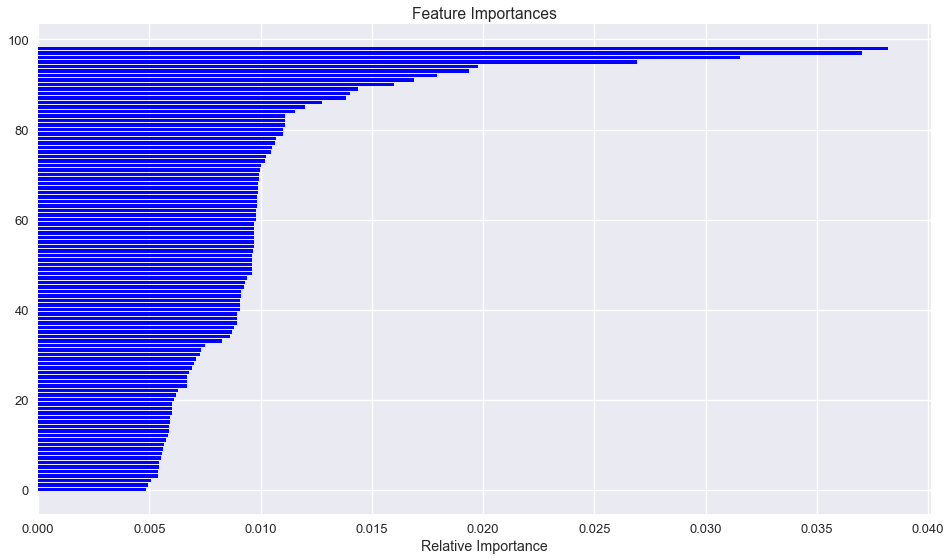

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='darkgrid',context ='talk', palette='Dark2')
import matplotlib.pyplot as plt
plt.subplots(figsize=(16,9))
importances = randomForestClassifier.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.xlabel('Relative Importance')
plt.show()

#### 3.3 Feature Selection
In machine learning and statistics, feature selection, also known as variable selection, attribute selection or variable subset selection, is the process of selecting a subset of relevant features (variables, predictors) for use in model construction. There are a number of methods for feature selection.<br>
1) Univariate Statistics<br>
2) Iterative Selection<br>
3) Model-based Selection

####  Here we will use Model-based Selection

In [71]:
from sklearn.feature_selection import SelectFromModel
select = SelectFromModel(RandomForestClassifier(n_estimators = 1000, random_state = 42),threshold='median')
select.fit(X_train,y_train)
date = '2008-01-01'
for frequency in [50,100,250]:
    tic=time.time()
    finalData1['Prediction']=0
    for i,dt in enumerate(finalData1[date:].index):
        if np.mod(i,frequency)==0:
            train=finalData1[:dt]
            X_train=train[features]
            X_train_s = select.transform(X_train)
            y_train=train['Target1']
            randomForestClassifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', max_features = 'log2', max_depth = 10, min_samples_leaf = 20, random_state = 42)
            randomForestClassifier.fit(X_train_s,y_train)
            print('Retraining the model after incrementing the data by :',frequency)
            print('Shape of train data(rows,columns):',X_train_s.shape)
        test=finalData1[dt:][:1]
        X_test=test[features]
        X_test_s = select.transform(X_test)
        y_test=test['Target1']
        y_pred = randomForestClassifier.predict(X_test_s)
        finalData1.loc[dt,'Prediction']=y_pred
    score=accuracy_score(finalData1['Prediction'][date:],finalData1['Target1'][date:])
    toc=time.time()
    print('------------Accuracy obtained by incrementing the data by ',frequency,' is :{:.4f}'.format(score),'------------------')
    print('------------------------Time taken to find the accuracy:{:.4f}'.format(toc-tic),'seconds ------------------------------')

Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5020, 50)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5070, 50)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5120, 50)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5170, 50)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5220, 50)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5270, 50)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5320, 50)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5370, 50)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5420, 50)
Retraining the model after incrementing the data by : 50
Shape of train d

Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (5270, 50)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (5520, 50)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (5770, 50)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (6020, 50)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (6270, 50)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (6520, 50)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (6770, 50)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (7020, 50)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (7270, 50)
------------Accuracy obtained by incrementing the data by  250  

#### 2. Logistic Regression:
In statistics, the logistic model (or logit model) is a statistical model with input (independent variable) a continuous variable and output (dependent variable) a binary variable, where a unit change in the input multiplies the odds of the two possible outputs by a constant factor. For example, a logistic model with possible outputs A and B could have odds of A:B as 2x:1 for input x: if the input is 0, there are even odds (1:1) of either output, while if the input is 1, the odds are 2:1 for the output to be A versus B, and if the input is −1, the odds are 1/2:1 = 1:2 for the output to be A versus B. In regression analysis, logistic regression or logit regression is estimating the parameters of a logistic model. More formally, a logistic model is one where the log-odds of the outputs are a linear function of the input. The two possible output values are often labelled as "0" and "1", which represent outcomes such as pass/fail, win/lose, alive/dead or healthy/sick. The logistic model generalizes easily to multiple inputs, where the log-odds are linear in all the inputs (with one parameters per input); and, with more modification, to more outputs: categorical outputs with more than two values are modelled by multinomial logistic regressions, and if the multiple categories are ordered, by ordinal logistic regression.

In [70]:
X = finalData1.iloc[:, 0:99].values
y = finalData1.iloc[:, 99].values
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
sc = StandardScaler()
X = finalData1.iloc[:, 0:99].values
y = finalData1.iloc[:, 99].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
logisticRegression = LogisticRegression()
logisticRegression.fit(X_train, y_train)
y_pred = logisticRegression.predict(X_test)
print('----------------------Printing results on test data------------------------')
print('Accuracy Score:{:.4f}'.format(accuracy_score(y_test,y_pred)))
print('F1 Score:{:.4f}'.format(f1_score(y_test,y_pred)))

----------------------Printing results on test data------------------------
Accuracy Score:0.5239
F1 Score:0.5103


#### Finding the best hyper-parameters via loop

In [73]:
days = 4000
tic=time.time()
bestParameter = None
bestScore = -1
bestScoreF1 = -1
for c in [0.1,1,10,100]:
    averageAccuracy = []
    for i in range(0,1000,100):
        train=finalData1[i:i+days]
        X_train=train[features]
        y_train=train['Target1']
        sc.fit(X_train)
        X_train_std=sc.transform(X_train)
        logisticRegression = LogisticRegression(C = c)
        logisticRegression.fit(X_train_std,y_train)
        test=finalData1[i+days:i+days+100]
        X_test=test[features]
        y_test=test['Target1']
        X_test_std=sc.transform(X_test)
        y_pred = logisticRegression.predict(X_test_std)
        score = accuracy_score(y_pred,y_test)
        scoreF1 = f1_score(y_pred,y_test)
        scoreRocAuc = roc_auc_score(y_pred,y_test)
        averageAccuracy.append(score)
        if score > bestScore:
            bestParameter = c
            bestScore = score
        if scoreF1 > bestScoreF1:
            bestScoreF1 = scoreF1
    print('--------------Printing the result when the parameter C is :',c,'------------------')
    print('Average Accuracy Score:{:.4f}'.format(np.mean(averageAccuracy)))
    toc=time.time()
print('Total time to perform cross-validation and find the best parameter:{:.4f}'.format(toc-tic),'seconds')
print('-----------------------Best Accuracy Score:',bestScore,'-----------------------')
print('-----------------------Best F1 Score:{:.2f}'.format(bestScoreF1),'--------------------------')
print('-----------------------Best Parameter(C):',bestParameter,'------------------------')

--------------Printing the result when the parameter C is : 0.1 ------------------
Average Accuracy Score:0.5020
--------------Printing the result when the parameter C is : 1 ------------------
Average Accuracy Score:0.4950
--------------Printing the result when the parameter C is : 10 ------------------
Average Accuracy Score:0.5000
--------------Printing the result when the parameter C is : 100 ------------------
Average Accuracy Score:0.5000
Total time to perform cross-validation and find the best parameter:45.8350 seconds
-----------------------Best Accuracy Score: 0.58 -----------------------
-----------------------Best F1 Score:0.69 --------------------------
-----------------------Best Parameter(C): 100 ------------------------


#### Finding the best hyper-parameters via Grid-Search

In [74]:
param_grid = {'C':[0.1,1,10,100],'penalty':['l1','l2']}
grid = GridSearchCV(logisticRegression, param_grid,cv=10,n_jobs=-1)
tempFeatures = finalData1.iloc[0:500,0:99].values
tempLabels = finalData1.iloc[0:500,99].values
grid.fit(tempFeatures,tempLabels)
print("Best Parameters obtained using Grid-Search :",grid.best_params_)

Best Parameters obtained using Grid-Search : {'C': 100, 'penalty': 'l1'}


#### Predicting the 10 years out of sample stock price prediction of the stock Apple

In [75]:
date = '2008-01-01'
for frequency in [50,100,250]:
    tic = time.time()
    finalData1['Prediction']=0
    for i,dt in enumerate(finalData1[date:].index):
        if np.mod(i,frequency)==0:
            train=finalData1[:dt]
            X_train=train[features]
            y_train=train['Target1']
            sc.fit(X_train)
            X_train_std=sc.transform(X_train)
            logisticRegression = LogisticRegression(C = 100, penalty = 'l1' )
            logisticRegression.fit(X_train_std,y_train)
            print('Retraining the model after incrementing the data by :',frequency)
            print('Shape of train data(rows,columns):',X_train_std.shape)
        test=finalData1[dt:][:1]
        X_test=test[features]
        y_test=test['Target1']
        X_test_std=sc.transform(X_test)
        y_pred = logisticRegression.predict(X_test_std)
        finalData1.loc[dt,'Prediction']=y_pred
    score=accuracy_score(finalData1['Prediction'][date:],finalData1['Target1'][date:])
    toc = time.time()
    print('------------Accuracy obtained by incrementing the data by ',frequency,' is :{:.4f}'.format(score),'------------------')
    print('------------------------Time taken to find the accuracy:{:.4f}'.format(toc-tic),'seconds ------------------------------')

Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5020, 99)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5070, 99)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5120, 99)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5170, 99)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5220, 99)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5270, 99)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5320, 99)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5370, 99)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5420, 99)
Retraining the model after incrementing the data by : 50
Shape of train d

Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (5270, 99)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (5520, 99)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (5770, 99)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (6020, 99)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (6270, 99)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (6520, 99)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (6770, 99)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (7020, 99)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (7270, 99)
------------Accuracy obtained by incrementing the data by  250  

#### Finding the best features and checking the score

In [201]:
select = SelectFromModel(LogisticRegression(C = 100, penalty = 'l1'),threshold='median')
select.fit(X_train,y_train)
date = '2008-01-01'
for frequency in [50,100,250]:
    tic = time.time()
    finalData1['Prediction']=0
    for i,dt in enumerate(finalData1[date:].index):
        if np.mod(i,frequency)==0:
            train=finalData1[:dt]
            X_train=train[features]
            X_train_s = select.transform(X_train)
            y_train=train['Target1']
            sc.fit(X_train_s)
            X_train_std=sc.transform(X_train_s)
            logisticRegression = LogisticRegression(C = 100, penalty = 'l1')
            logisticRegression.fit(X_train_std,y_train)
            print('Retraining the model after incrementing the data by :',frequency)
            print('Shape of train data(rows,columns):',X_train_std.shape)
        test=finalData1[dt:][:1]
        X_test=test[features]
        X_test_s = select.transform(X_test)
        y_test=test['Target1']
        X_test_std=sc.transform(X_test_s)
        y_pred = logisticRegression.predict(X_test_std)
        finalData1.loc[dt,'Prediction']=y_pred
    score=accuracy_score(finalData1['Prediction'][date:],finalData1['Target1'][date:])
    toc = time.time()
    print('------------Accuracy obtained by incrementing the data by ',frequency,' is :{:.4f}'.format(score),'------------------')
    print('------------------------Time taken to find the accuracy:{:.4f}'.format(toc-tic),'seconds ------------------------------')

Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5020, 50)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5070, 50)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5120, 50)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5170, 50)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5220, 50)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5270, 50)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5320, 50)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5370, 50)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5420, 50)
Retraining the model after incrementing the data by : 50
Shape of train d

Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (5270, 50)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (5520, 50)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (5770, 50)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (6020, 50)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (6270, 50)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (6520, 50)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (6770, 50)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (7020, 50)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (7270, 50)
------------Accuracy obtained by incrementing the data by  250  

#### 3. Support Vector Classifier:
In machine learning, support vector machines are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier. An SVM model is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible. New examples are then mapped into that same space and predicted to belong to a category based on which side of the gap they fall.In addition to performing linear classification, SVMs can efficiently perform a non-linear classification using what is called the kernel trick, implicitly mapping their inputs into high-dimensional feature spaces.

In [72]:
X = finalData1.iloc[:, 0:99].values
y = finalData1.iloc[:, 99].values
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
sc = StandardScaler()
X = finalData1.iloc[:, 0:99].values
y = finalData1.iloc[:, 99].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
supportVectorClassifier = SVC(kernel = 'rbf',random_state=123)
supportVectorClassifier.fit(X_train, y_train)
y_pred = supportVectorClassifier.predict(X_test)
print('----------------------Printing results on test data------------------------')
print('Accuracy Score:{:.4f}'.format(accuracy_score(y_test,y_pred)))
print('F1 Score:{:.4f}'.format(f1_score(y_test,y_pred)))

----------------------Printing results on test data------------------------
Accuracy Score:0.5253
F1 Score:0.4922


#### Finding the best hyper-parameters via loop

In [162]:
days = 4000
tic=time.time()
bestParameterGamma = None
bestParameterC = None
bestScore = -1
bestScoreF1 = -1
for c in [0.01,0.1,1,10,100]:
     for g in [0.001,0.01,0.1]:
        averageAccuracy = []
        for i in range(0,1000,100):
            train=finalData1[i:i+days]
            X_train=train[features]
            y_train=train['Target1']
            sc.fit(X_train)
            X_train_std=sc.transform(X_train)
            supportVectorClassifier = SVC(kernel = 'rbf', C = c, gamma = g)
            supportVectorClassifier.fit(X_train_std,y_train)
            test=finalData1[i+days:i+days+100]
            X_test=test[features]
            y_test=test['Target1']
            X_test_std=sc.transform(X_test)
            y_pred = supportVectorClassifier.predict(X_test_std)
            score = accuracy_score(y_pred,y_test)
            scoreF1 = f1_score(y_pred,y_test)
            averageAccuracy.append(score)
            if score > bestScore:
                bestParameterGamma = g
                bestParameterC = c
                bestScore = score
            if scoreF1 > bestScoreF1:
                bestScoreF1 = scoreF1
        print('--------------Printing the result when the parameter C is:',c,'& parameter gamma is:',g,'------------------')
        print('Average Accuracy Score:{:.4f}'.format(np.mean(averageAccuracy)))
toc=time.time()
print('Total time to perform cross-validation and find the best parameter:{:.4f}'.format(toc-tic),'seconds')
print('-----------------------Best Accuracy Score:',bestScore,'-----------------------')
print('-----------------------Best F1 Score:{:.2f}'.format(bestScoreF1),'--------------------------')
print('-----------------------Best Parameter(C):',bestParameterC,'------------------------')
print('-----------------------Best Parameter(Gamma):',bestParameterGamma,'------------------------')

--------------Printing the result when the parameter C is: 0.01 & parameter gamma is: 0.001 ------------------
Average Accuracy Score:0.4580
--------------Printing the result when the parameter C is: 0.01 & parameter gamma is: 0.01 ------------------
Average Accuracy Score:0.4580
--------------Printing the result when the parameter C is: 0.01 & parameter gamma is: 0.1 ------------------
Average Accuracy Score:0.4580
--------------Printing the result when the parameter C is: 0.1 & parameter gamma is: 0.001 ------------------
Average Accuracy Score:0.4720
--------------Printing the result when the parameter C is: 0.1 & parameter gamma is: 0.01 ------------------
Average Accuracy Score:0.4800
--------------Printing the result when the parameter C is: 0.1 & parameter gamma is: 0.1 ------------------
Average Accuracy Score:0.4580
--------------Printing the result when the parameter C is: 1 & parameter gamma is: 0.001 ------------------
Average Accuracy Score:0.4880
--------------Printing th

#### Finding the best hyper-parameters via Grid-Search

In [164]:
param_grid = {'C':[10,100], 'gamma':[0.01,0.1,1]}
grid = GridSearchCV(supportVectorClassifier, param_grid,cv=10,n_jobs=-1)
tempFeatures = finalData1.iloc[0:500,0:99].values
tempLabels = finalData1.iloc[0:500,99].values
grid.fit(tempFeatures,tempLabels)
print("Best Parameters obtained using Grid-Search :",grid.best_params_)

Best Parameters obtained using Grid-Search : {'C': 10, 'gamma': 0.01}


#### Predicting the 10 years out of sample stock price prediction of the stock Apple

In [203]:
date = '2008-01-01'
for frequency in [50,100,250]:
    tic=time.time()
    finalData1['Prediction']=0
    for i,dt in enumerate(finalData1[date:].index):
        if np.mod(i,frequency)==0:
            train=finalData1[:dt]
            X_train=train[features]
            y_train=train['Target1']
            sc.fit(X_train)
            X_train_std=sc.transform(X_train)
            supportVectorClassifier = SVC(kernel = 'rbf', C = 10, gamma = 0.01 )
            supportVectorClassifier.fit(X_train_std,y_train)
            print('Retraining the model after incrementing the data by :',frequency)
            print('Shape of train data(rows,columns):',X_train_std.shape)
        test=finalData1[dt:][:1]
        X_test=test[features]
        y_test=test['Target1']
        X_test_std=sc.transform(X_test)
        y_pred = supportVectorClassifier.predict(X_test_std)
        finalData1.loc[dt,'Prediction']=y_pred
    score=accuracy_score(finalData1['Prediction'][date:],finalData1['Target1'][date:])
    toc = time.time()
    print('------------Accuracy obtained by incrementing the data by ',frequency,' is :{:.4f}'.format(score),'------------------')
    print('------------------------Time taken to find the accuracy:{:.4f}'.format(toc-tic),'seconds ------------------------------')

Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5020, 99)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5070, 99)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5120, 99)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5170, 99)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5220, 99)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5270, 99)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5320, 99)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5370, 99)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5420, 99)
Retraining the model after incrementing the data by : 50
Shape of train d

Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (5270, 99)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (5520, 99)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (5770, 99)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (6020, 99)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (6270, 99)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (6520, 99)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (6770, 99)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (7020, 99)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (7270, 99)
------------Accuracy obtained by incrementing the data by  250  

#### Here we can't use Model-Based Feature Selection as the SVM kernel used is non-linear. Thus, we will use Univariate Statistics to find the best features

In [204]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectPercentile, f_classif
select = SelectPercentile(f_classif, percentile=40)
X_train = X[:5260]
y_train = y[:5260]
select.fit(X_train,y_train)
date = '2008-01-01'
for frequency in [50,100,250]:
    tic = time.time()
    finalData1['Prediction']=0
    for i,dt in enumerate(finalData1[date:].index):
        if np.mod(i,frequency)==0:
            train=finalData1[:dt]
            X_train=train[features]
            X_train_s = select.transform(X_train)
            y_train=train['Target1']
            sc.fit(X_train_s)
            X_train_std=sc.transform(X_train_s)
            supportVectorClassifier = SVC(kernel= 'rbf', C = 0.1, gamma = 0.01 )
            supportVectorClassifier.fit(X_train_std,y_train)
            print('Retraining the model after incrementing the data by :',frequency)
            print('Shape of train data(rows,columns):',X_train_std.shape)
        test=finalData1[dt:][:1]
        X_test=test[features]
        X_test_s = select.transform(X_test)
        y_test=test['Target1']
        X_test_std=sc.transform(X_test_s)
        y_pred = supportVectorClassifier.predict(X_test_std)
        finalData1.loc[dt,'Prediction']=y_pred
    score=accuracy_score(finalData1['Prediction'][date:],finalData1['Target1'][date:])
    toc = time.time()
    print('------------Accuracy obtained by incrementing the data by ',frequency,' is :{:.4f}'.format(score),'------------------')
    print('------------------------Time taken to find the accuracy:{:.4f}'.format(toc-tic),'seconds ------------------------------')

Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5020, 40)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5070, 40)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5120, 40)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5170, 40)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5220, 40)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5270, 40)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5320, 40)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5370, 40)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5420, 40)
Retraining the model after incrementing the data by : 50
Shape of train d

Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (5270, 40)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (5520, 40)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (5770, 40)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (6020, 40)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (6270, 40)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (6520, 40)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (6770, 40)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (7020, 40)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (7270, 40)
------------Accuracy obtained by incrementing the data by  250  

#### 4. Long short-term memory:
Long short-term memory (LSTM) units (or blocks) are a building unit for layers of a recurrent neural network (RNN). A RNN composed of LSTM units is often called an LSTM network. A common LSTM unit is composed of a cell, an input gate, an output gate and a forget gate. The cell is responsible for "remembering" values over arbitrary time intervals; hence the word "memory" in LSTM. Each of the three gates can be thought of as a "conventional" artificial neuron, as in a multi-layer (or feedforward) neural network: that is, they compute an activation (using an activation function) of a weighted sum. Intuitively, they can be thought as regulators of the flow of values that goes through the connections of the LSTM; hence the denotation "gate". There are connections between these gates and the cell.The expression long short-term refers to the fact that LSTM is a model for the short-term memory which can last for a long period of time. An LSTM is well-suited to classify, process and predict time series given time lags of unknown size and duration between important events. LSTMs were developed to deal with the exploding and vanishing gradient problem when training traditional RNNs. Relative insensitivity to gap length gives an advantage to LSTM over alternative RNNs, hidden Markov models and other sequence learning methods in numerous applications.

In [97]:
import numpy as np
from pandas_datareader import data as pdr
import warnings
import matplotlib.pyplot as plt
import functools as ft
import operator
import datetime
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")
from pandas_datareader import data as pdr
import fix_yahoo_finance as yahoo
yahoo.pdr_override()
start = "1998-01-01" 
end = "2018-01-01"
AppleLSTM = pdr.get_data_yahoo("AAPL",start,end)
AppleLSTM.shape

[*********************100%***********************]  1 of 1 downloaded


(5032, 6)

#### Standardizing and reshaping the data in the appropriate format

In [98]:
cl = AppleLSTM.Open
scl = MinMaxScaler()
cl = cl.reshape(cl.shape[0],1)
cl = scl.fit_transform(cl)

#### Splitting the data into training set and testing set

In [99]:
def processData(data,lb):
    X,Y = [],[]
    for i in range(len(data)-lb-1):
        X.append(data[i:(i+lb),0])
        Y.append(data[(i+lb),0])
    return np.array(X),np.array(Y)
X,y = processData(cl,60)
X_train,X_test = X[:int(X.shape[0]*0.80)],X[int(X.shape[0]*0.80):]
y_train,y_test = y[:int(y.shape[0]*0.80)],y[int(y.shape[0]*0.80):]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [100]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


#### Designing the LSTM Model

In [101]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

#### Fitting the model

In [102]:
regressor.fit(X_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
3976/3976 [==============================] - 18s 5ms/step - loss: 0.0023
Epoch 2/10
3976/3976 [==============================] - 16s 4ms/step - loss: 5.1075e-04
Epoch 3/10
3976/3976 [==============================] - 18s 5ms/step - loss: 5.0472e-04
Epoch 4/10
3976/3976 [==============================] - 18s 5ms/step - loss: 4.0777e-04
Epoch 5/10
3976/3976 [==============================] - 18s 5ms/step - loss: 4.4009e-04
Epoch 6/10
3976/3976 [==============================] - 18s 5ms/step - loss: 3.5627e-04
Epoch 7/10
3976/3976 [==============================] - 18s 5ms/step - loss: 3.3499e-04
Epoch 8/10
3976/3976 [==============================] - 18s 5ms/step - loss: 3.8792e-04
Epoch 9/10
3976/3976 [==============================] - 19s 5ms/step - loss: 3.0943e-04
Epoch 10/10
3976/3976 [==============================] - 18s 5ms/step - loss: 3.8672e-04


#### Testing the model

In [103]:
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))
Xt = regressor.predict(X_test)
pred_normal = scl.inverse_transform(Xt)
y_test_normal = scl.inverse_transform(y_test.reshape(-1,1))

#### Plotting the graph

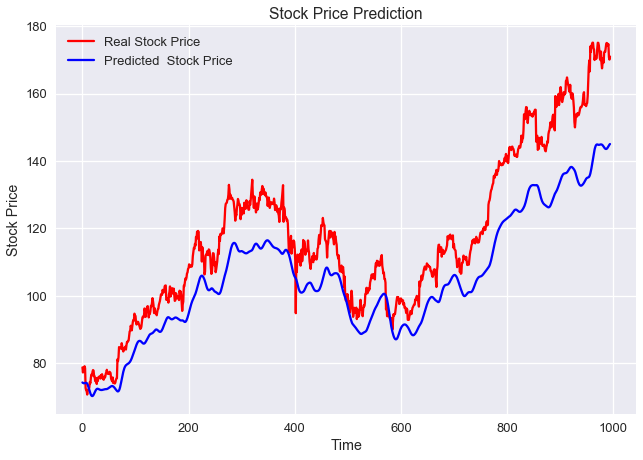

In [104]:
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)), color = 'red', label = 'Real Stock Price')
plt.plot(scl.inverse_transform(Xt), color = 'blue', label = 'Predicted  Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

#### Defining the label for classification and calculating the different scores

In [105]:
def calTarget(df):
    list_y =[]
    temp = df
    for i in range(len(temp)-1):
        if temp[i+1] > temp[i]:
            y = 1
        else:
            y = -1
            
        list_y.append(y)
    ydf = pd.DataFrame(list_y)
    return ydf

In [106]:
y_test_trend = calTarget(y_test_normal)
pred_trend =calTarget(pred_normal)

In [107]:
print('----------------------Printing results on test data------------------------')
print('Accuracy Score:{:.4f}'.format(accuracy_score(y_test_trend,pred_trend)))
print('F1 Score:{:.4f}'.format(f1_score(y_test_trend,pred_trend)))

----------------------Printing results on test data------------------------
Accuracy Score:0.5151
F1 Score:0.5764


#### LABEL 2 : 3-day Simple Moving Average Prediction

#### 1. Random Forest Classifier:

#### Applying the same procedure for label 2

In [75]:
X = finalData2.iloc[:, 0:99].values
y = finalData2.iloc[:, 99].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
randomForestClassifier = RandomForestClassifier(n_estimators = 100, random_state = 42)
randomForestClassifier.fit(X_train, y_train)
y_pred = randomForestClassifier.predict(X_test)
print('----------------------Printing results on test data------------------------')
print('Accuracy Score:{:.4f}'.format(accuracy_score(y_test,y_pred)))
print('F1 Score:{:.4f}'.format(f1_score(y_test,y_pred)))

----------------------Printing results on test data------------------------
Accuracy Score:0.6718
F1 Score:0.7003


In [71]:
days = 4000
tic=time.time()
bestParameter = None
bestScore = -1
bestScoreF1 = -1
for n in [10,100,1000]:
    averageAccuracy = []
    for i in range(0,1000,100):
        train=finalData2[i:i+days][:-2]
        X_train=train[features]
        y_train=train['Target2']
        randomForestClassifier = RandomForestClassifier(n_estimators = n, random_state = 42)
        randomForestClassifier.fit(X_train,y_train)
        test=finalData2[i+days:i+days+100]
        X_test=test[features]
        y_test=test['Target2']
        y_pred = randomForestClassifier.predict(X_test)
        score = accuracy_score(y_pred,y_test)
        scoreF1 = f1_score(y_pred,y_test)
        averageAccuracy.append(score)
        if score > bestScore:
            bestParameter = n
            bestScore = score
        if scoreF1 > bestScoreF1:
            bestScoreF1 = scoreF1
    print('--------------Printing the result when the parameter n is :',n,'------------------')
    print('Average Accuracy Score:{:.4f}'.format(np.mean(averageAccuracy)))
toc=time.time()
print('Total time to perform cross-validation and find the best parameter:{:.4f}'.format(toc-tic),'seconds')
print('-----------------------Best Accuracy Score:',bestScore,'-----------------------')
print('-----------------------Best F1 Score:{:.2f}'.format(bestScoreF1),'--------------------------')
print('-----------------------Best Parameter(n):',bestParameter,'------------------------')

--------------Printing the result when the parameter n is : 10 ------------------
Average Accuracy Score:0.5720
--------------Printing the result when the parameter n is : 100 ------------------
Average Accuracy Score:0.6070
--------------Printing the result when the parameter n is : 1000 ------------------
Average Accuracy Score:0.6110
Total time to perform cross-validation and find the best parameter:335.2098 seconds
-----------------------Best Accuracy Score: 0.72 -----------------------
-----------------------Best F1 Score:0.77 --------------------------
-----------------------Best Parameter(n): 1000 ------------------------


In [217]:
param_grid = {"n_estimators":[100,1000],"criterion":["entropy","gini"],"max_features":["log2","auto",None],
              "max_depth":[10,20,None],"min_samples_leaf":[10,20]}
grid = GridSearchCV(randomForestClassifier,param_grid,cv=10,scoring='accuracy',n_jobs=-1)
tempFeatures = finalData2.iloc[0:250,0:99].values
tempLabels = finalData2.iloc[0:250,99].values
grid.fit(tempFeatures,tempLabels)
print("Best Parameters obtained using Grid-Search :",grid.best_params_)

Best Parameters obtained using Grid-Search : {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 20, 'n_estimators': 1000}


In [218]:
date = '2008-01-01'
for frequency in [50,100,250]:
    tic = time.time()
    finalData2['Prediction']=0
    for i,dt in enumerate(finalData2[date:].index):
        if np.mod(i,frequency)==0:
            train=finalData2[:dt][:-2]
            X_train=train[features]
            y_train=train['Target2']
            randomForestClassifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', max_features = 'auto', max_depth = 10, min_samples_leaf = 20, random_state = 42)
            randomForestClassifier.fit(X_train,y_train)
            print('Retraining the model after incrementing the data by :',frequency)
            print('Shape of train data(rows,columns):',X_train.shape)
        test=finalData2[dt:][:1]
        X_test=test[features]
        y_test=test['Target2']
        y_pred = randomForestClassifier.predict(X_test)
        finalData2.loc[dt,'Prediction']=y_pred
    score=accuracy_score(finalData2['Prediction'][date:],finalData2['Target2'][date:])
    toc = time.time()
    print('------------Accuracy obtained by incrementing the data by ',frequency,' is :{:.4f}'.format(score),'------------------')
    print('------------------------Time taken to find the accuracy:{:.4f}'.format(toc-tic),'seconds ------------------------------')

Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5018, 99)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5068, 99)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5118, 99)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5168, 99)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5218, 99)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5268, 99)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5318, 99)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5368, 99)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5418, 99)
Retraining the model after incrementing the data by : 50
Shape of train d

Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (5268, 99)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (5518, 99)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (5768, 99)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (6018, 99)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (6268, 99)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (6518, 99)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (6768, 99)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (7018, 99)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (7268, 99)
------------Accuracy obtained by incrementing the data by  250  

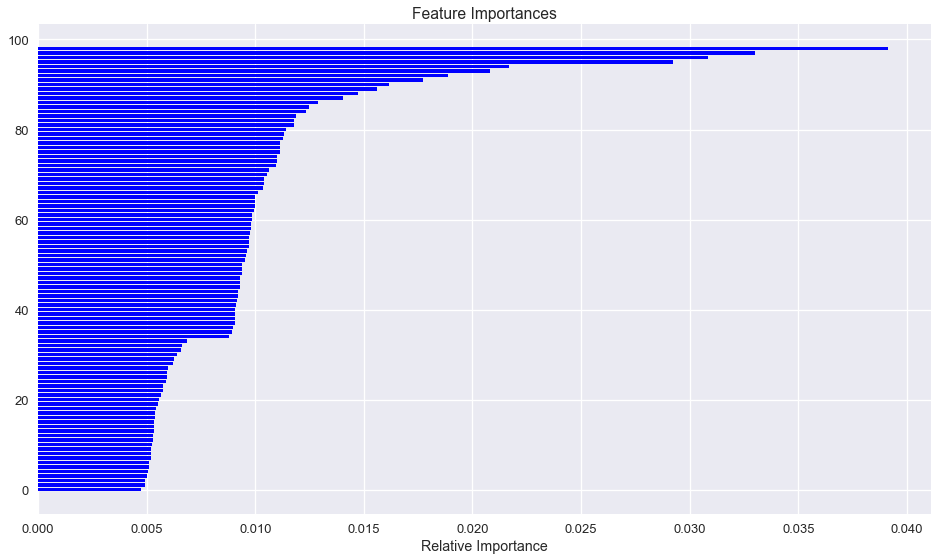

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='darkgrid',context ='talk', palette='Dark2')
import matplotlib.pyplot as plt
plt.subplots(figsize=(16,9))
importances = randomForestClassifier.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.xlabel('Relative Importance')
plt.show()

In [219]:
from sklearn.feature_selection import SelectFromModel
select = SelectFromModel(RandomForestClassifier(n_estimators = 100, random_state = 42),threshold='median')
select.fit(X_train,y_train)
date = '2008-01-01'
for frequency in [50,100,250]:
    tic=time.time()
    finalData2['Prediction']=0
    for i,dt in enumerate(finalData2[date:].index):
        if np.mod(i,frequency)==0:
            train=finalData2[:dt][:-2]
            X_train=train[features]
            X_train_s = select.transform(X_train)
            y_train=train['Target2']
            randomForestClassifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', max_features = 'auto', max_depth = 10, min_samples_leaf = 5, random_state = 42)
            randomForestClassifier.fit(X_train_s,y_train)
            print('Retraining the model after incrementing the data by :',frequency)
            print('Shape of train data(rows,columns):',X_train_s.shape)
        test=finalData2[dt:][:1]
        X_test=test[features]
        X_test_s = select.transform(X_test)
        y_test=test['Target2']
        y_pred = randomForestClassifier.predict(X_test_s)
        finalData2.loc[dt,'Prediction']=y_pred
    score=accuracy_score(finalData2['Prediction'][date:],finalData2['Target2'][date:])
    toc=time.time()
    print('------------Accuracy obtained by incrementing the data by ',frequency,' is :{:.4f}'.format(score),'------------------')
    print('------------------------Time taken to find the accuracy:{:.4f}'.format(toc-tic),'seconds ------------------------------')

Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5018, 50)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5068, 50)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5118, 50)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5168, 50)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5218, 50)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5268, 50)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5318, 50)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5368, 50)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5418, 50)
Retraining the model after incrementing the data by : 50
Shape of train d

Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (5268, 50)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (5518, 50)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (5768, 50)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (6018, 50)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (6268, 50)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (6518, 50)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (6768, 50)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (7018, 50)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (7268, 50)
------------Accuracy obtained by incrementing the data by  250  

#### 2. Logistic Regression:

#### Applying the same procedure for label 2

In [220]:
X = finalData2.iloc[:, 0:99].values
y = finalData2.iloc[:, 99].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
logisticRegression = LogisticRegression()
logisticRegression.fit(X_train, y_train)
y_pred = logisticRegression.predict(X_test)
print('----------------------Printing results on test data------------------------')
print('Accuracy Score:{:.4f}'.format(accuracy_score(y_test,y_pred)))
print('F1 Score:{:.4f}'.format(f1_score(y_test,y_pred)))

----------------------Printing results on test data------------------------
Accuracy Score:0.6755
F1 Score:0.7120


In [169]:
days = 4000
tic=time.time()
bestParameter = None
bestScore = -1
bestScoreF1 = -1
for c in [0.01,0.1,1,10,100]:
    averageAccuracy = []
    for i in range(0,1000,100):
        train=finalData2[i:i+days][:-2]
        X_train=train[features]
        y_train=train['Target2']
        sc.fit(X_train)
        X_train_std=sc.transform(X_train)
        logisticRegression = LogisticRegression(C = c)
        logisticRegression.fit(X_train_std,y_train)
        test=finalData2[i+days:i+days+100]
        X_test=test[features]
        y_test=test['Target2']
        X_test_std=sc.transform(X_test)
        y_pred = logisticRegression.predict(X_test_std)
        score = accuracy_score(y_pred,y_test)
        scoreF1 = accuracy_score(y_pred,y_test)
        averageAccuracy.append(score)
        if score > bestScore:
            bestParameter = c
            bestScore = score
        if scoreF1 > bestScoreF1:
            bestScoreF1 = scoreF1
    print('--------------Printing the result when the parameter C is :',c,'------------------')
    print('Average Accuracy Score:{:.4f}'.format(np.mean(averageAccuracy)))
toc=time.time()
print('Total time to perform cross-validation and find the best parameter:{:.4f}'.format(toc-tic),'seconds')
print('-----------------------Best Accuracy Score:',bestScore,'-----------------------')
print('-----------------------Best F1 Score:{:.2f}'.format(bestScoreF1),'--------------------------')
print('-----------------------Best Parameter(C):',bestParameter,'------------------------')

--------------Printing the result when the parameter C is : 0.01 ------------------
Average Accuracy Score:0.6630
--------------Printing the result when the parameter C is : 0.1 ------------------
Average Accuracy Score:0.6360
--------------Printing the result when the parameter C is : 1 ------------------
Average Accuracy Score:0.6330
--------------Printing the result when the parameter C is : 10 ------------------
Average Accuracy Score:0.6330
--------------Printing the result when the parameter C is : 100 ------------------
Average Accuracy Score:0.6280
Total time to perform cross-validation and find the best parameter:40.3801 seconds
-----------------------Best Accuracy Score: 0.73 -----------------------
-----------------------Best F1 Score:0.73 --------------------------
-----------------------Best Parameter(C): 0.01 ------------------------


In [168]:
param_grid = {'C':[0.01,0.1,1,10,100],'penalty':['l1','l2']}
grid = GridSearchCV(logisticRegression, param_grid,cv=10,n_jobs=-1)
tempFeatures = finalData2.iloc[0:500,0:99].values
tempLabels = finalData2.iloc[0:500,99].values
grid.fit(tempFeatures,tempLabels)
print("Best Parameters obtained using Grid-Search :",grid.best_params_)

Best Parameters obtained using Grid-Search : {'C': 0.1, 'penalty': 'l1'}


#### Using C = 0.01 as it gives the best average accuracy score

In [221]:
date = '2008-01-01'
for frequency in [50,100,250]:
    tic = time.time()
    finalData2['Prediction']=0
    for i,dt in enumerate(finalData2[date:].index):
        if np.mod(i,frequency)==0:
            train=finalData2[:dt][:-2]
            X_train=train[features]
            y_train=train['Target2']
            sc.fit(X_train)
            X_train_std=sc.transform(X_train)
            logisticRegression = LogisticRegression(C = 0.01, penalty = 'l1' )
            logisticRegression.fit(X_train_std,y_train)
            print('Retraining the model after incrementing the data by :',frequency)
            print('Shape of train data(rows,columns):',X_train_std.shape)
        test=finalData2[dt:][:1]
        X_test=test[features]
        y_test=test['Target2']
        X_test_std=sc.transform(X_test)
        y_pred = logisticRegression.predict(X_test_std)
        finalData2.loc[dt,'Prediction']=y_pred
    score=accuracy_score(finalData2['Prediction'][date:],finalData2['Target2'][date:])
    toc = time.time()
    print('------------Accuracy obtained by incrementing the data by ',frequency,' is :{:.4f}'.format(score),'------------------')
    print('------------------------Time taken to find the accuracy:{:.4f}'.format(toc-tic),'seconds ------------------------------')

Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5018, 99)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5068, 99)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5118, 99)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5168, 99)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5218, 99)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5268, 99)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5318, 99)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5368, 99)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5418, 99)
Retraining the model after incrementing the data by : 50
Shape of train d

Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (5268, 99)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (5518, 99)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (5768, 99)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (6018, 99)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (6268, 99)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (6518, 99)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (6768, 99)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (7018, 99)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (7268, 99)
------------Accuracy obtained by incrementing the data by  250  

In [222]:
select = SelectFromModel(LogisticRegression(C = 0.1),threshold='median')
select.fit(X_train,y_train)
date = '2008-01-01'
for frequency in [50,100,250]:
    tic = time.time()
    finalData2['Prediction']=0
    for i,dt in enumerate(finalData2[date:].index):
        if np.mod(i,frequency)==0:
            train=finalData2[:dt][:-2]
            X_train=train[features]
            X_train_s = select.transform(X_train)
            y_train=train['Target2']
            sc.fit(X_train_s)
            X_train_std=sc.transform(X_train_s)
            logisticRegression = LogisticRegression(C = 0.01, penalty = 'l1')
            logisticRegression.fit(X_train_std,y_train)
            print('Retraining the model after incrementing the data by :',frequency)
            print('Shape of train data(rows,columns):',X_train_std.shape)
        test=finalData2[dt:][:1]
        X_test=test[features]
        X_test_s = select.transform(X_test)
        y_test=test['Target2']
        X_test_std=sc.transform(X_test_s)
        y_pred = logisticRegression.predict(X_test_std)
        finalData2.loc[dt,'Prediction']=y_pred
    score=accuracy_score(finalData2['Prediction'][date:],finalData2['Target2'][date:])
    toc = time.time()
    print('------------Accuracy obtained by incrementing the data by ',frequency,' is :{:.4f}'.format(score),'------------------')
    print('------------------------Time taken to find the accuracy:{:.4f}'.format(toc-tic),'seconds ------------------------------')

Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5018, 50)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5068, 50)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5118, 50)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5168, 50)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5218, 50)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5268, 50)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5318, 50)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5368, 50)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5418, 50)
Retraining the model after incrementing the data by : 50
Shape of train d

Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (5268, 50)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (5518, 50)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (5768, 50)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (6018, 50)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (6268, 50)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (6518, 50)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (6768, 50)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (7018, 50)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (7268, 50)
------------Accuracy obtained by incrementing the data by  250  

#### 3. Support Vector Classifier:

#### Applying the same procedure for label 2

In [73]:
from sklearn.svm import SVC
X = finalData2.iloc[:, 0:99].values
y = finalData2.iloc[:, 99].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
supportVectorClassifier = SVC(kernel = 'rbf',random_state=123)
supportVectorClassifier.fit(X_train, y_train)
y_pred = supportVectorClassifier.predict(X_test)
print('----------------------Printing results on test data------------------------')
print('Accuracy Score:{:.4f}'.format(accuracy_score(y_test,y_pred)))
print('F1 Score:{:.4f}'.format(f1_score(y_test,y_pred)))

----------------------Printing results on test data------------------------
Accuracy Score:0.6809
F1 Score:0.7135


In [171]:
days = 4000
tic=time.time()
bestParameterGamma = None
bestParameterC = None
bestScore = -1
bestScoreF1 = -1
for c in [0.01,0.1,1,10,100]:
     for g in [0.001,0.01,0.1]:
        averageAccuracy = []
        for i in range(0,1000,100):
            train=finalData2[i:i+days][:-2]
            X_train=train[features]
            y_train=train['Target2']
            sc.fit(X_train)
            X_train_std=sc.transform(X_train)
            supportVectorClassifier = SVC(kernel = 'rbf', C = c, gamma = g)
            supportVectorClassifier.fit(X_train_std,y_train)
            test=finalData2[i+days:i+days+100]
            X_test=test[features]
            y_test=test['Target2']
            X_test_std=sc.transform(X_test)
            y_pred = supportVectorClassifier.predict(X_test_std)
            score = accuracy_score(y_pred,y_test)
            scoreF1 = f1_score(y_pred,y_test)
            averageAccuracy.append(score)
            if score > bestScore:
                bestParameterGamma = g
                bestParameterC = c
                bestScore = score
            if scoreF1 > bestScoreF1:
                bestScoreF1 = scoreF1
        print('--------------Printing the result when the parameter C is:',c,'& parameter gamma is:',g,'------------------')
        print('Average Accuracy Score:{:.4f}'.format(np.mean(averageAccuracy)))
toc=time.time()
print('Total time to perform cross-validation and find the best parameter:{:.4f}'.format(toc-tic),'seconds')
print('-----------------------Best Accuracy Score:',bestScore,'-----------------------')
print('-----------------------Best F1 Score:{:.2f}'.format(bestScoreF1),'--------------------------')
print('-----------------------Best Parameter(C):',bestParameterC,'------------------------')
print('-----------------------Best Parameter(Gamma):',bestParameterGamma,'------------------------')

--------------Printing the result when the parameter C is: 0.01 & parameter gamma is: 0.001 ------------------
Average Accuracy Score:0.5270
--------------Printing the result when the parameter C is: 0.01 & parameter gamma is: 0.01 ------------------
Average Accuracy Score:0.5950
--------------Printing the result when the parameter C is: 0.01 & parameter gamma is: 0.1 ------------------
Average Accuracy Score:0.5260
--------------Printing the result when the parameter C is: 0.1 & parameter gamma is: 0.001 ------------------
Average Accuracy Score:0.6500
--------------Printing the result when the parameter C is: 0.1 & parameter gamma is: 0.01 ------------------
Average Accuracy Score:0.6000
--------------Printing the result when the parameter C is: 0.1 & parameter gamma is: 0.1 ------------------
Average Accuracy Score:0.5260
--------------Printing the result when the parameter C is: 1 & parameter gamma is: 0.001 ------------------
Average Accuracy Score:0.6390
--------------Printing th

In [177]:
param_grid = {'C':[0.1,1,10,100], 'gamma':[0.001,0.01,0.1]}
supportVectorClassifier = SVC()
grid = GridSearchCV(supportVectorClassifier, param_grid,cv=10,n_jobs=-1)
tempFeatures = finalData2.iloc[0:500,0:99].values
tempLabels = finalData2.iloc[0:500,99].values
grid.fit(tempFeatures,tempLabels)
print("Best Parameters obtained using Grid-Search :",grid.best_params_)

Best Parameters obtained using Grid-Search : {'C': 0.01, 'gamma': 0.001}


#### Using C = 0.1 & gamma = 0.001 as it gave the best average accuarcy score 

In [224]:
date = '2008-01-01'
for frequency in [50,100,250]:
    tic=time.time()
    finalData2['Prediction']=0
    for i,dt in enumerate(finalData2[date:].index):
        if np.mod(i,frequency)==0:
            train=finalData2[:dt][:-2]
            X_train=train[features]
            y_train=train['Target2']
            sc.fit(X_train)
            X_train_std=sc.transform(X_train)
            supportVectorClassifier = SVC(kernel = 'rbf', C = 0.1, gamma = 0.001 )
            supportVectorClassifier.fit(X_train_std,y_train)
            print('Retraining the model after incrementing the data by :',frequency)
            print('Shape of train data(rows,columns):',X_train_std.shape)
        test=finalData2[dt:][:1]
        X_test=test[features]
        y_test=test['Target2']
        X_test_std=sc.transform(X_test)
        y_pred = supportVectorClassifier.predict(X_test_std)
        finalData2.loc[dt,'Prediction']=y_pred
    score=accuracy_score(finalData2['Prediction'][date:],finalData2['Target2'][date:])
    toc = time.time()
    print('------------Accuracy obtained by incrementing the data by ',frequency,' is :{:.4f}'.format(score),'------------------')
    print('------------------------Time taken to find the accuracy:{:.4f}'.format(toc-tic),'seconds ------------------------------')

Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5018, 99)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5068, 99)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5118, 99)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5168, 99)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5218, 99)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5268, 99)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5318, 99)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5368, 99)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5418, 99)
Retraining the model after incrementing the data by : 50
Shape of train d

Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (5268, 99)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (5518, 99)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (5768, 99)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (6018, 99)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (6268, 99)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (6518, 99)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (6768, 99)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (7018, 99)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (7268, 99)
------------Accuracy obtained by incrementing the data by  250  

In [76]:
import time
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectPercentile, f_classif
select = SelectPercentile(f_classif, percentile=50)
X_train = X[:5260]
y_train = y[:5260]
select.fit(X_train,y_train)
date = '2008-01-01'
for frequency in [50,100,250]:
    tic = time.time()
    finalData2['Prediction']=0
    for i,dt in enumerate(finalData2[date:].index):
        if np.mod(i,frequency)==0:
            train=finalData2[:dt][:-2]
            X_train=train[features]
            X_train_s = select.transform(X_train)
            y_train=train['Target2']
            sc.fit(X_train_s)
            X_train_std=sc.transform(X_train_s)
            supportVectorClassifier = SVC(kernel= 'rbf', C = 0.01, gamma = 0.001 )
            supportVectorClassifier.fit(X_train_std,y_train)
            print('Retraining the model after incrementing the data by :',frequency)
            print('Shape of train data(rows,columns):',X_train_std.shape)
        test=finalData2[dt:][:1]
        X_test=test[features]
        X_test_s = select.transform(X_test)
        y_test=test['Target2']
        X_test_std=sc.transform(X_test_s)
        y_pred = supportVectorClassifier.predict(X_test_std)
        finalData2.loc[dt,'Prediction']=y_pred
    score=accuracy_score(finalData2['Prediction'][date:],finalData2['Target2'][date:])
    toc = time.time()
    print('------------Accuracy obtained by incrementing the data by ',frequency,' is :{:.4f}'.format(score),'------------------')
    print('------------------------Time taken to find the accuracy:{:.4f}'.format(toc-tic),'seconds ------------------------------')

Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5018, 49)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5068, 49)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5118, 49)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5168, 49)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5218, 49)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5268, 49)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5318, 49)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5368, 49)
Retraining the model after incrementing the data by : 50
Shape of train data(rows,columns): (5418, 49)
Retraining the model after incrementing the data by : 50
Shape of train d

Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (5268, 49)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (5518, 49)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (5768, 49)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (6018, 49)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (6268, 49)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (6518, 49)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (6768, 49)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (7018, 49)
Retraining the model after incrementing the data by : 250
Shape of train data(rows,columns): (7268, 49)
------------Accuracy obtained by incrementing the data by  250  

#### From the above results of Support Vector Classifier we see that Univariate Statistics fails in this case

### 4. Building a trading strategy

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns

In [78]:
sns.set(style='darkgrid',context ='talk', palette='Dark2')

In [79]:
dateFormat = mdates.DateFormatter('%m/%y')

#### A Moving Average Trading Strategy
Let us attempt to use the moving averages calculated above to design a trading strategy. It is natural to assume that when a change in the long term behaviour of the asset occurs, the actual price timeseries will react faster than the EMA one. Therefore, we will consider the crossing of the two as potential trading signals.<br>
1.When the price timeseries p(t) crosses the EMA timeseries e(t) from below, we will close any existing short position and go long (buy) one unit of the asset.<br>
2.When the price timeseries p(t) crosses the EMA timeseries e(t) from above, we will close any existing long position and go short (sell) one unit of the asset.<br>
The trick to implement this is to take the sign of the difference between then price p(t) and the EMA e(t).

#### Thus as shown earlier a label 3 is made named difference which represents the sign of the difference between the closing price and the EMA

#### Now we will apply Logistic Regression to predict the sign of the difference between the closing price and the EMA and build the above mentioned trading strategy based on the obtained predicted label

In [82]:
Data = Data.drop(['EMA6_Apple','EMA6_SP','EMA6_NASDAQ','EMA12_Apple','EMA12_SP','EMA12_NASDAQ'],axis=1)

In [83]:
Data.columns

Index(['Date', 'SP_Open', 'SP_High', 'SP_Low', 'SP_Close', 'SP_Adj_Close',
       'SP_Volume', 'NASDAQ_Open', 'NASDAQ_Close', 'NASDAQ_High',
       ...
       'FI_Apple', 'Chaikin_SP', 'Chaikin_NASDAQ', 'Chaikin_Apple',
       'StdDev_SP', 'StdDev_NASDAQ', 'StdDev_Apple', 'Target1', 'Target2',
       'Difference'],
      dtype='object', length=103)

In [84]:
Data = Data.set_index('Date')

In [85]:
X = Data.iloc[:, 0:99].values
y = Data.iloc[:, 101].values

In [86]:
X_train = X[0:5210]
y_train = y[0:5210]
X_test = X[5210:]
y_test = y[5210:]
randomForestClassifier = RandomForestClassifier(n_estimators = 1000, random_state =42)
randomForestClassifier.fit(X_train,y_train)
y_pred = randomForestClassifier.predict(X_test)
print('----------------------Printing results on test data------------------------')
print('Accuracy Score:{:.4f}'.format(accuracy_score(y_test,y_pred)))
print('F1 Score:{:.4f}'.format(f1_score(y_test,y_pred)))

----------------------Printing results on test data------------------------
Accuracy Score:0.8518
F1 Score:0.8891


In [87]:
data = pd.DataFrame()
data['Apple'] = Data['Apple_Close'][5210:]

In [88]:
Data['Prediction'] = 0
tradePositionPred = pd.DataFrame()
Data['Prediction'][5210:] = y_pred
tradePositionPred['Apple'] = Data['Prediction'][5210:]

Before seeing the performance of this strategy, let us focus on the first day t0 when the price timeseries p(t0) crosses above and EMA timeseries e(t0). Since p(t0) > e(t0). At that point the trading weight w(t0) becomes positive, and thus according to our trading strategy, we need to set for that day w(t0)=1.However, bear in mind that p(t0) is the price of the asset at the close of day t0. For this reason, we will not know that p(t0) > e(t0) until the close of the trading day. Therefore, when calculating the returns of the strategy, to assume that on day to we had a long position is an error; it is equivalent to us peaking into the future, since we only know we have to go long at the end of day to.The best we can do is assume that we traded at the close of this day t0. Therefore our position will be long starting on the following day, t0+1. This is easily corrected for by lagging our trading positions by one day, so that on day to our actual position is that of the previous day to−1 and only on day t0+1 do we have a long position.

#### Thus we will shift the Trading Positions by 1 day

In [89]:
finalPredPosition = tradePositionPred.shift(1)

#### Plotting the graph of Trading Position (buy or sell)

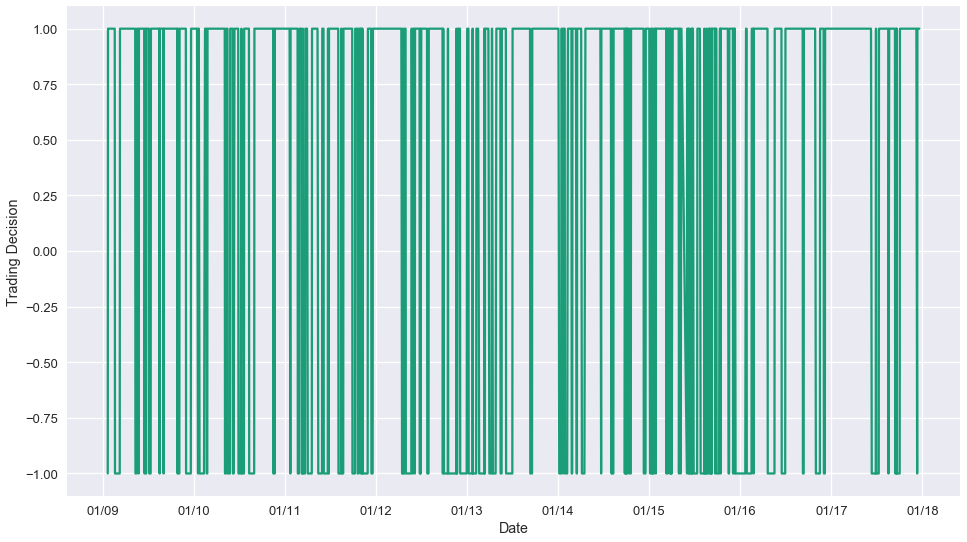

In [90]:
startDate = '2009-01-22'
endDate = '2017-12-20'
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(finalPredPosition.loc[startDate:endDate, :].index, finalPredPosition.loc[startDate:endDate, 'Apple'], label='Trading position')
ax.set_xlabel('Date')
ax.set_ylabel('Trading Decision')
ax.xaxis.set_major_formatter(dateFormat)

#### Calculating the log returns

In [91]:
import numpy as np
logReturns = np.log(data).diff()

#### To get all the strategy log-returns for all days, we will multiply the strategy positions with the log-returns

In [92]:
strategyPredReturns = finalPredPosition * logReturns

Log-returns can be added to show performance across time.
#### Let us plot the cumulative log-returns of our strategy for the assets

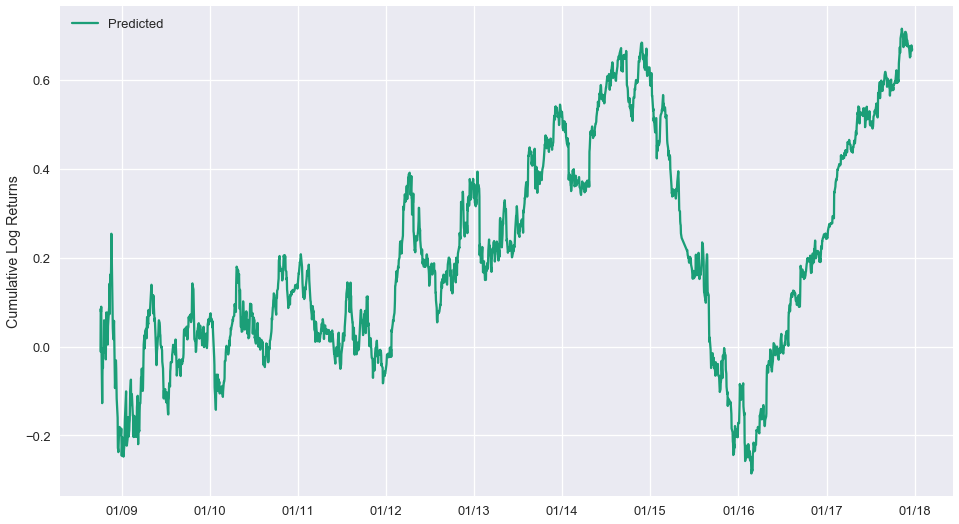

In [93]:
cumStrategyPredReturns = strategyPredReturns.cumsum()
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(cumStrategyPredReturns.index, cumStrategyPredReturns, label = 'Predicted')
ax.set_ylabel('Cumulative Log Returns')
ax.legend(loc='best')
ax.xaxis.set_major_formatter(dateFormat)

#### Let us plot the cumulative total relative returns of our strategy for the assets 

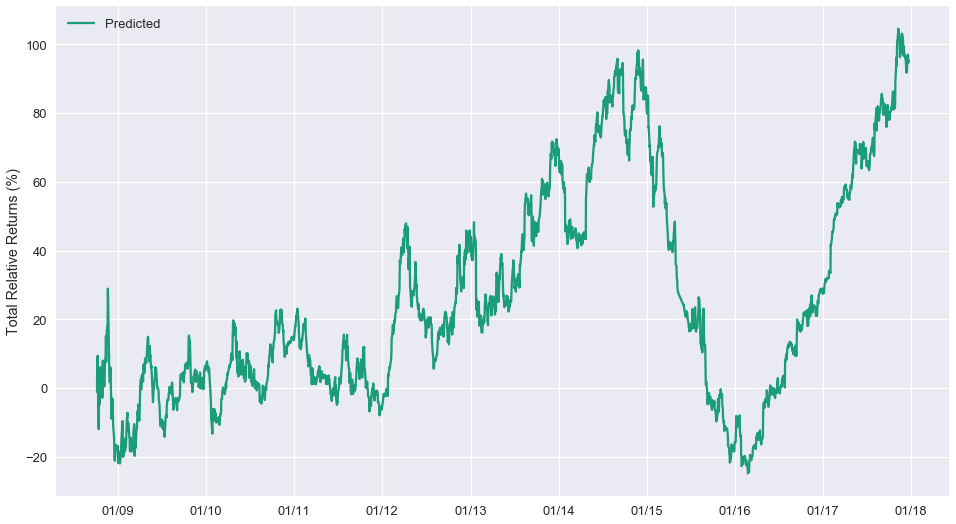

In [94]:
cumStrategyPredRelativeReturns = np.exp(cumStrategyPredReturns) - 1
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(cumStrategyPredRelativeReturns.index,100* cumStrategyPredRelativeReturns, label = 'Predicted' )
ax.set_ylabel('Total Relative Returns (%)')
ax.legend(loc='best')
ax.xaxis.set_major_formatter(dateFormat)

#### Now we will calculate the overall performance of our strategy by defining a function portfolioStats

In [95]:
cumStrategyRelativeReturns = cumStrategyPredRelativeReturns.sum(axis=1)

In [96]:
def portfolioStats(cumRelativeReturns, days = 252):
    totalDays = cumRelativeReturns.shape[0]
    years = totalDays / days
    totalPortfolioReturn = cumRelativeReturns[-1]
    averageYearlyReturn = (1 + totalPortfolioReturn)**(1/years) - 1
    print('Total Portfolio Return : ' + '{:5.2f}'.format(100*totalPortfolioReturn) + '%')
    print('Average Yearly Return : ' + '{:5.2f}'.format(100*averageYearlyReturn) + '%')

portfolioStats(cumStrategyRelativeReturns)

Total Portfolio Return : 95.46%
Average Yearly Return :  7.59%


### 5. Analysis and Conclusion 
The result shows that for Apple the prediction is robust and about 69%. This is very sound result since the next 1 day price is highly noisy in stock market and should be close to random. With this model, we can do better than random walk consitently.
The result is very helpful in real-world investment for non-HFT inverster. By learning from past data we are able to get above 69% accurate prediction on the next couple day’s trend. For future work, it worth adding sentiment data as features to augment the technical features. The challenge is how to eliminate as much as noise in sentiment data and quantify them.

### Result Table

#### LABEL 1
|   Classifiers             |     Frequency     | Average Accuracy % | Best Accuracy Score % | 
| :-----------------------: | :---------------: | :--------------:   | :-----------------:   |
| Random Forest Classifier  |      50           |     54.30          |          -            |
| Random Forest Classifier  |      100          |     53.42          |         63.00         |
| Random Forest Classifier  |      250          |     53.86          |          -            |
| Logistic Regression       |      50           |     51.34          |          -            |
| Logistic Regression       |      100          |     51.66          |         58.00         |
| Logistic Regression       |      250          |     51.66          |          -            |
| Support Vector Classifier |      50           |     51.06          |          -            |
| Support Vector Classifier |      100          |     51.30          |         66.00         |
| Support Vector Classifier |      250          |     50.94          |          -            |
| Long Short Term Memory    |       -           |     51.51          |            -          |

#### LABEL 2
|   Classifiers             |     Frequency     | Average Accuracy % | Best Accuracy Score % | 
| :-----------------------: | :---------------: | :--------------:   | :-----------------:   |
| Random Forest Classifier  |      50           |     68.31          |          -            |
| Random Forest Classifier  |      100          |     68.19          |         72.00         |
| Random Forest Classifier  |      250          |     68.67          |          -            |
| Logistic Regression       |      50           |     68.99          |          -            |
| Logistic Regression       |      100          |     68.59          |         73.00         |
| Logistic Regression       |      250          |     68.91          |          -            |
| Support Vector Classifier |      50           |     67.15          |          -            |
| Support Vector Classifier |      100          |     66.75          |         79.00         |
| Support Vector Classifier |      250          |     67.31          |          -            |

#### Reference:
Stock Trend Prediction with Technical Indicators using SVM by Xinjie Di <br>
Deep learning with long short-term memory networks for financial market predictions by Thomas Fischer, Christopher Krauss <br>
Advances in Financial Machine Learning by Marcos Lopez De Prado